### Proyecto 2

#### Parte A

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#Espacio destinado para la importación de herramientas

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

#Warnings
warnings.filterwarnings('ignore')

In [146]:
#Cargamos nuevamente el Dataset 
df2 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
#Imprmimos la forma del dataset
print(df2.shape)
#Imprmimimos el encabezado las primeras 5 lineas
df2.head()


(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [147]:
#Obtenemos los valores de la columna "L2"
df2.l2.unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste'],
      dtype=object)

In [148]:
# Obtenemos los valores de la columna "currency"
df2.currency.unique()

array(['USD'], dtype=object)

In [149]:
# Obtenemos los valores de la columna "Property_type"
df2.operation_type.unique()

array(['Venta'], dtype=object)

In [150]:
#Eliminamos las columnas que no utilizaremos
df2 = df2.drop(columns=["end_date", "start_date", "created_on", "currency", "description", "operation_type", "title", "l1"])

In [151]:
#Imprmimos el % de valores faltantes por columna
for col in df2.columns:
  nulos = df2[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/146660))

lat 6.77%
lon 6.79%
l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 14.00%
surface_covered 14.74%
price 0.00%
property_type 0.00%


##### Tratamiento de Features Surface_covered y Surface_total

In [152]:
#Llenamos los valores faltantes de Superficie Total y Cubierta con los correspondientes a cada registro en forma cruzada
df2.surface_covered.fillna(df2.surface_total, inplace=True)
df2.surface_total.fillna(df2.surface_covered, inplace=True)

In [153]:
# Volvemos a imprmir los % de valores faltantes por columna para ver el impacto de lo implementado
for col in df2.columns:
  nulos = df2[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/146660))

lat 6.77%
lon 6.79%
l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 13.65%
surface_covered 13.65%
price 0.00%
property_type 0.00%


In [154]:
# Obtenemos el promedio de las superficies totales (agrupados por el tipo de propiedad)
mean_surface = df2[["surface_total", "property_type"]].groupby("property_type").agg(pd.Series.median)
mean_surface.to_dict()

{'surface_total': {'Casa': 300.0,
  'Casa de campo': 2462.0,
  'Cochera': 13.5,
  'Departamento': 67.0,
  'Depósito': 480.0,
  'Local comercial': 106.5,
  'Lote': 520.0,
  'Oficina': 65.0,
  'Otro': 678.0,
  'PH': 105.0}}

In [155]:
#Reemplazamos los valores faltantes con los valores obtenidos en el paso anterior
df2 = df2.set_index("property_type")
df2.surface_total.fillna(mean_surface.to_dict()["surface_total"], inplace=True)
df2.reset_index(inplace=True)
df2.head()

,property_type,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,PH,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0


In [156]:
# Volvemos a imprmir los % de valores faltantes por columna para ver el impacto de lo implementado
for col in df2.columns:
  nulos = df2[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
lat 6.77%
lon 6.79%
l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 0.00%
surface_covered 13.65%
price 0.00%


In [157]:
# Obtenemos el promedio de las superficies cubiertas (agrupados por el tipo de propiedad)
mean_surface_covered = df2[["surface_covered", "property_type"]].groupby("property_type").agg(pd.Series.median)
mean_surface_covered.to_dict()

{'surface_covered': {'Casa': 160.0,
  'Casa de campo': 161.5,
  'Cochera': 13.5,
  'Departamento': 60.0,
  'Depósito': 412.5,
  'Local comercial': 90.0,
  'Lote': 502.0,
  'Oficina': 57.0,
  'Otro': 406.0,
  'PH': 80.0}}

In [158]:
#Reemplazamos los valores faltantes con los valores obtenidos en el paso anterior
df2 = df2.set_index("property_type")
df2.surface_covered.fillna(mean_surface_covered.to_dict()["surface_covered"], inplace=True)
df2.reset_index(inplace=True)
df2.head()

,property_type,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,PH,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0


In [159]:
# Volvemos a imprmir los % de valores faltantes por columna para ver el impacto de lo implementado
for col in df2.columns:
  nulos = df2[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
lat 6.77%
lon 6.79%
l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 0.00%
surface_covered 0.00%
price 0.00%


##### Tratamiento de Features Latitud y Longitud

In [160]:
#Asignamos el valor de Latitud y Longitud de los valores faltantes, promedio por barrio (dato que si lo tenemos)
lon_city = df2[["lon", "l3"]].groupby("l3").agg(pd.Series.mean)
lat_city = df2[["lat", "l3"]].groupby("l3").agg(pd.Series.mean)
df2 = df2.set_index("l3")
df2.lon.fillna(lon_city.to_dict()["lon"], inplace=True)
df2.lat.fillna(lat_city.to_dict()["lat"], inplace=True)
#df2 = df2.reset_index()
df2.head()

,property_type,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
l3,,,,,,,,,,
San Cristobal,Departamento,-34.605880,-58.384949,Capital Federal,7.0,7.0,2.0,140.0,140.0,153000.0
Boedo,PH,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0
Palermo,PH,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0
Palermo,PH,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0
La Plata,PH,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,50.0,35.0,40000.0


In [161]:
df2 = df2.reset_index()
df2.head()

,l3,property_type,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,-34.605880,-58.384949,Capital Federal,7.0,7.0,2.0,140.0,140.0,153000.0
1,Boedo,PH,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0
2,Palermo,PH,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0
3,Palermo,PH,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0
4,La Plata,PH,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,50.0,35.0,40000.0


In [162]:
# Volvemos a imprmir los % de valores faltantes por columna para ver el impacto de lo implementado
for col in df2.columns:
  nulos = df2[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/146660))

l3 0.00%
property_type 0.00%
lat 0.00%
lon 0.00%
l2 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 0.00%
surface_covered 0.00%
price 0.00%


##### Tratamiento Feature Bathrooms

In [163]:
#Obtenemos la moda de la variable para asignarla a los valores faltantes
mode_city = df2[["bathrooms", "property_type"]].groupby("property_type").agg(pd.Series.mode)
mode_city.to_dict()

{'bathrooms': {'Casa': 2.0,
  'Casa de campo': 2.0,
  'Cochera': 1.0,
  'Departamento': 1.0,
  'Depósito': 1.0,
  'Local comercial': 1.0,
  'Lote': 1.0,
  'Oficina': 1.0,
  'Otro': 2.0,
  'PH': 1.0}}

In [164]:
df2 = df2.set_index("property_type")
df2.bathrooms.fillna(mode_city.to_dict()["bathrooms"], inplace=True)
df2 = df2.reset_index()
df2.head()

,property_type,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,San Cristobal,-34.605880,-58.384949,Capital Federal,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0
4,PH,La Plata,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,50.0,35.0,40000.0


In [165]:
# Volvemos a imprmir los % de valores faltantes por columna para ver el impacto de lo implementado
for col in df2.columns:
  nulos = df2[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
l3 0.00%
lat 0.00%
lon 0.00%
l2 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 0.00%
surface_covered 0.00%
price 0.00%


In [166]:
df2.isnull().sum()

property_type      0
l3                 0
lat                0
lon                0
l2                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

###### Finalmente obtuvimos todas las columnas que creemos pueden ser utiles para generar un modelo robusto, sin valores nulos y obtenidos con criterios robustos de igual manera

## Outliers

<AxesSubplot:xlabel='surface_total'>

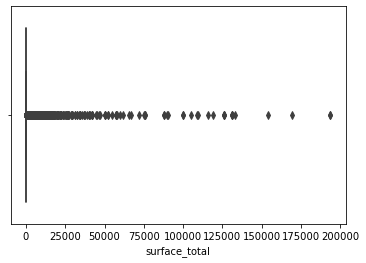

In [167]:
from numpy import mean
from numpy import std

#Análisis Surface_total
sns.boxplot(data = df2, x = "surface_total", showfliers=True)

In [168]:
df2['z_score']=stats.zscore(df2['surface_total'])
df2 = df2[(df2["z_score"].abs() <= 3 )]
df2 = df2.drop(columns=["z_score"])


<AxesSubplot:xlabel='surface_covered'>

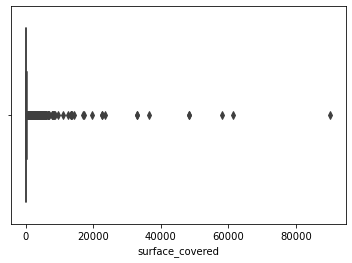

In [169]:
#Análisis Surface_Covered
sns.boxplot(data = df2, x = "surface_covered", showfliers=True)

In [170]:
df2['z_score']=stats.zscore(df2['surface_covered'])
df2 = df2[(df2["z_score"].abs() <= 3 )]
df2 = df2.drop(columns=["z_score"])
df2.shape



(146068, 11)

                 lat            lon          rooms       bedrooms  \
count  144713.000000  144713.000000  144713.000000  144713.000000   
mean      -34.601581     -58.467990       3.067900       1.973700   
std         0.456334       0.473897       1.396326       1.139794   
min       -35.150806    -180.000000       1.000000       0.000000   
25%       -34.626407     -58.508622       2.000000       1.000000   
50%       -34.599824     -58.443551       3.000000       2.000000   
75%       -34.571939     -58.407624       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  144713.000000  144713.000000    144713.000000  1.447130e+05  
mean        1.582664     148.261849        95.350556  2.409539e+05  
std         0.872375     260.770087        87.828288  3.164185e+05  
min         1.000000       1.000000         1.000000  5.500000e+03  
25%         1.000000      55.0000

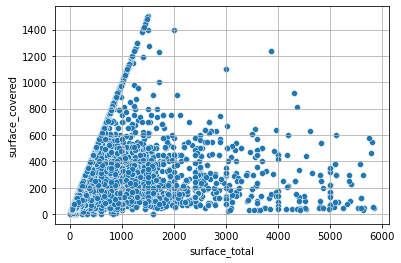

In [171]:
## Analisis de la consistencia de las superficies y corrección
df2 = df2[(df2["surface_total"] >= df2["surface_covered"] )]
print(df2.describe())
##Grafico para demostrar lo corregido
sns.scatterplot(data=df2, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

<AxesSubplot:xlabel='price'>

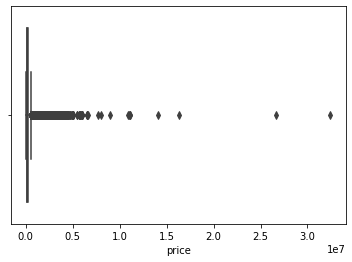

In [172]:
#Analisis del Precio
sns.boxplot(data = df2, x = "price", showfliers=True)

In [173]:
df2['z_score']=stats.zscore(df2['price'])
df2 = df2[(df2["z_score"].abs() <= 3 )]
df2 = df2.drop(columns=["z_score"])
df2.shape

(142411, 11)

<AxesSubplot:xlabel='bedrooms'>

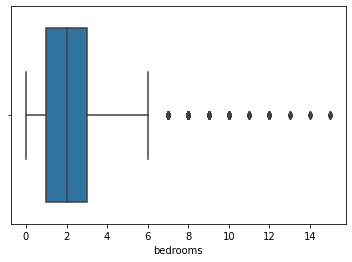

In [174]:
# Analisis de Bedrooms
sns.boxplot(data = df2, x = "bedrooms", showfliers=True)


In [175]:
df2['z_score']=stats.zscore(df2['bedrooms'])
df2 = df2[(df2["z_score"].abs() <= 3 )]
df2 = df2.drop(columns=["z_score"])
df2.shape

(141381, 11)

<AxesSubplot:xlabel='bathrooms'>

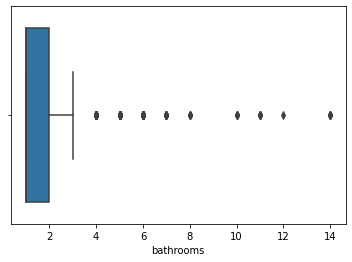

In [176]:
# Analisis de Bathrooms
sns.boxplot(data = df2, x = "bathrooms", showfliers=True)


In [177]:
df2['z_score']=stats.zscore(df2['bathrooms'])
df2 = df2[(df2["z_score"].abs() <= 3 )]
df2 = df2.drop(columns=["z_score"])
df2.shape

(137517, 11)

<AxesSubplot:xlabel='rooms'>

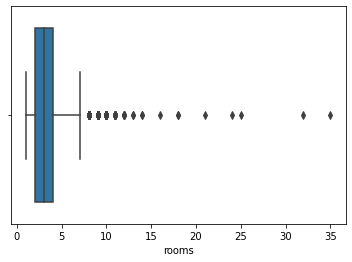

In [178]:
# Analisis de Rooms

sns.boxplot(data = df2, x = "rooms", showfliers=True)

In [179]:
df2['z_score']=stats.zscore(df2['rooms'])
df2 = df2[(df2["z_score"].abs() <= 3 )]
df2 = df2.drop(columns=["z_score"])
df2.shape

(136341, 11)

###### Escalado- Escalaremos los features Surface_total, Surface_covered y Price debido a que las magnitudes se encuentran en grandes dimensiones y eventualmente utilizando algun modelo que requierera coeficientes, podemos obtener mayores pesos en esas variables, aun en una variable a predecir como Price.

In [180]:
# Importamos las herramientas necesarias para el escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

###### Variable Surface_total

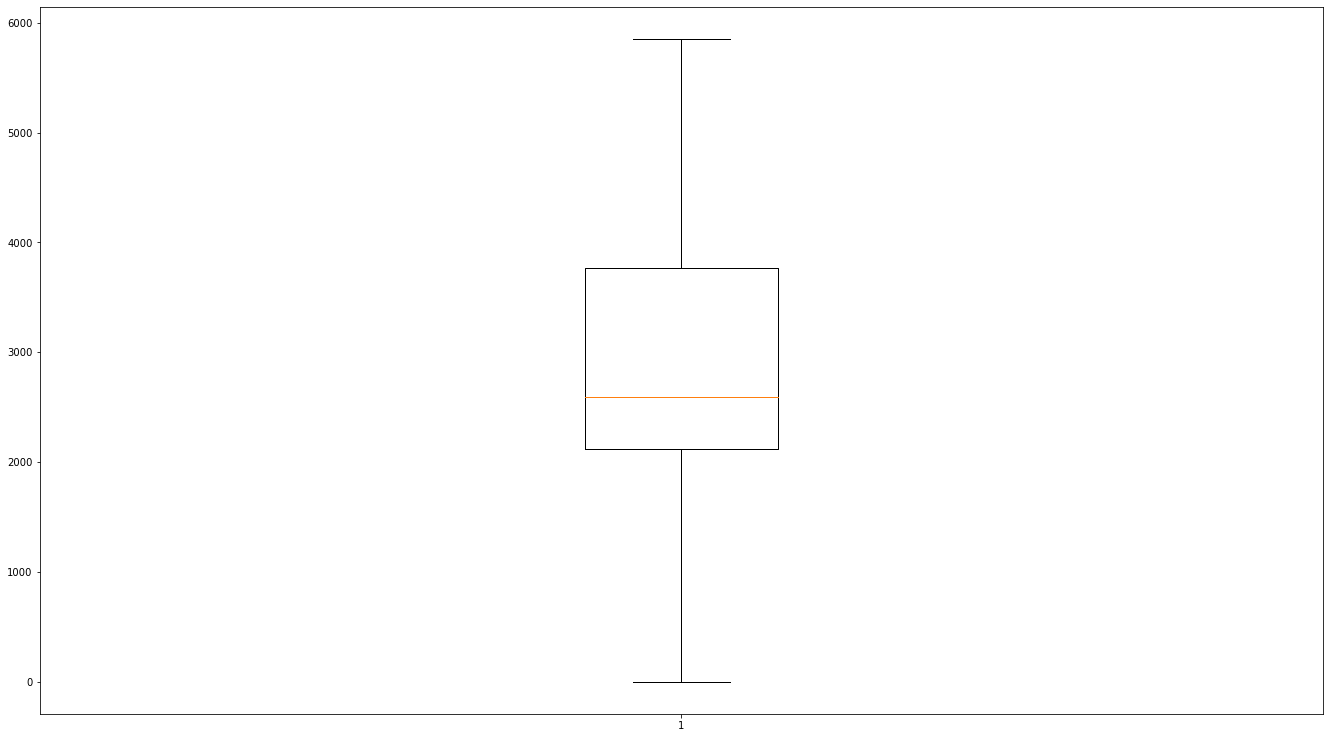

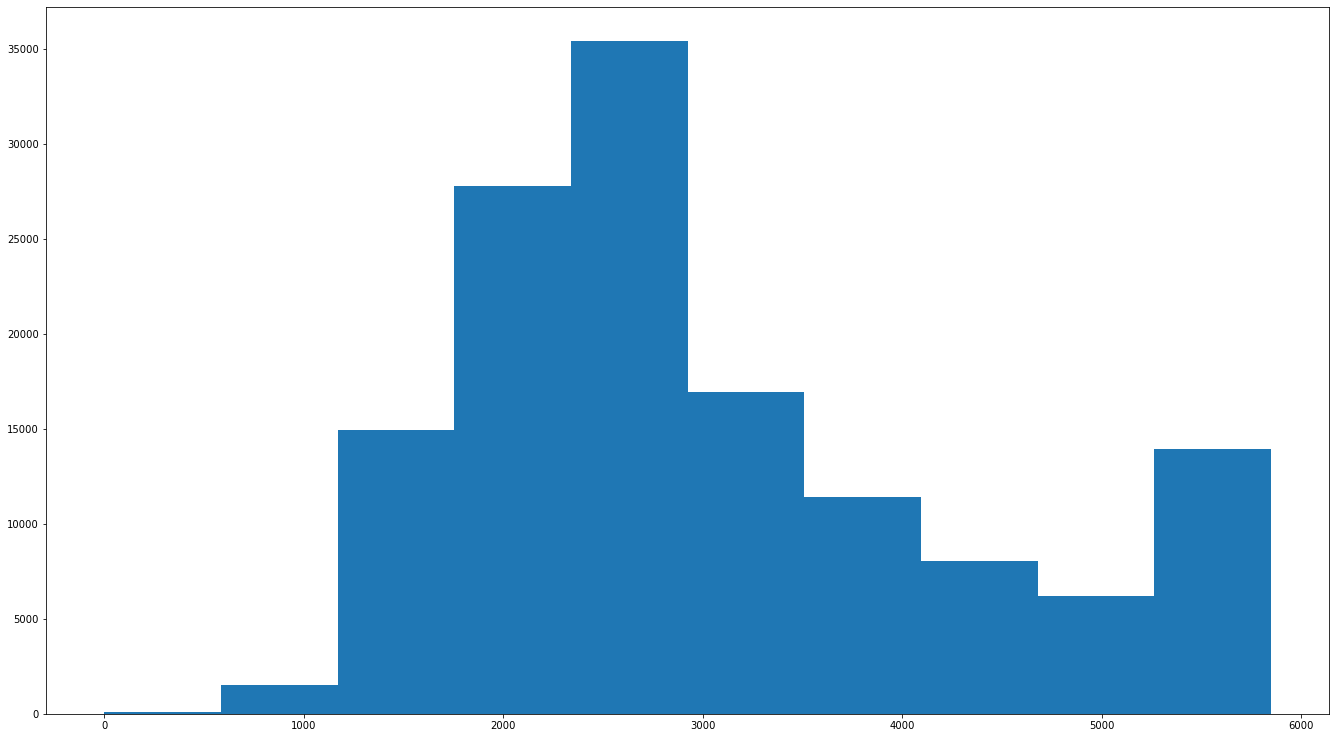

In [181]:
c = df2["surface_total"].copy()

min = c.min()
max = c.max()

c = np.array(c).reshape(-1,1)

c = MinMaxScaler(feature_range=(1,2)).fit_transform(c)

c = PowerTransformer(method='box-cox', standardize=True).fit_transform(c) #Escalado

c = MinMaxScaler(feature_range=(min,max)).fit_transform(c)

c = np.float32(c)

plt.figure(figsize=(23,13))
plt.boxplot(c) 
plt.show()
plt.figure(figsize=(23,13))
plt.hist(c) 
plt.show()
df2["surface_total"] = c


##### Surface_coverer

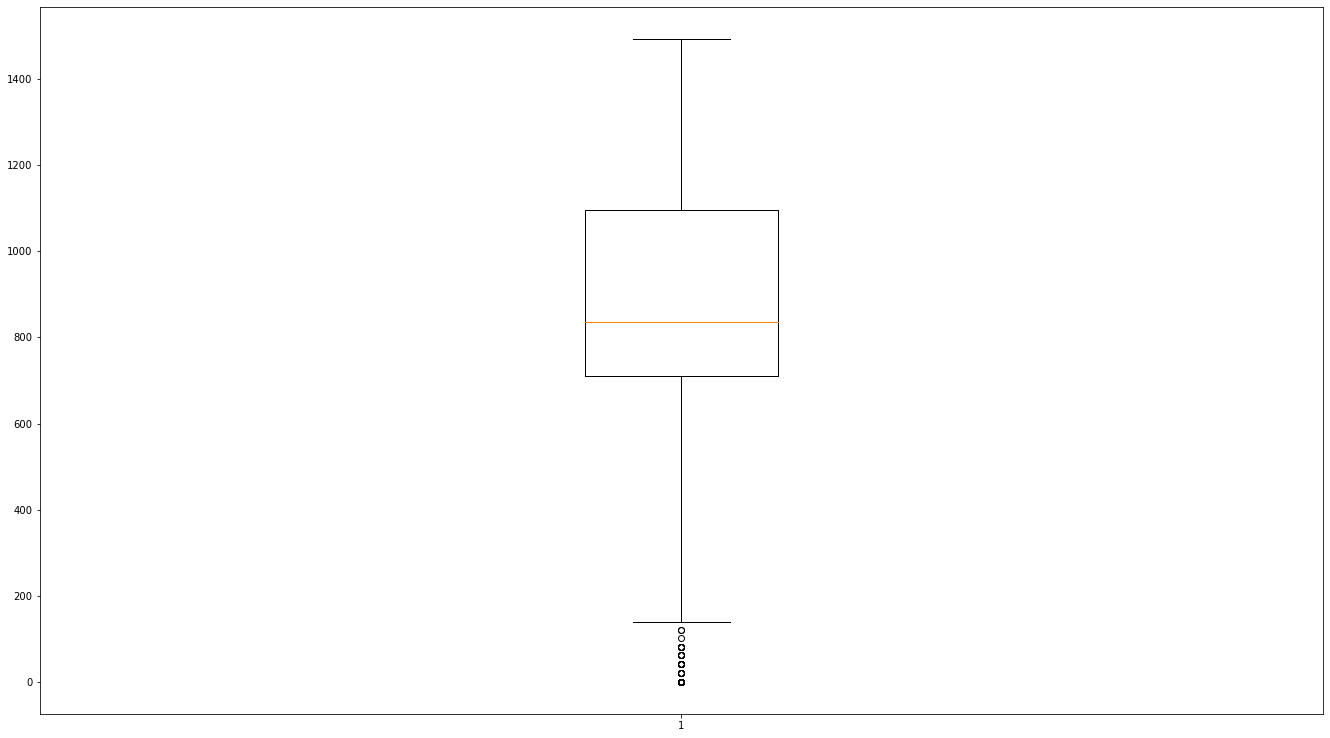

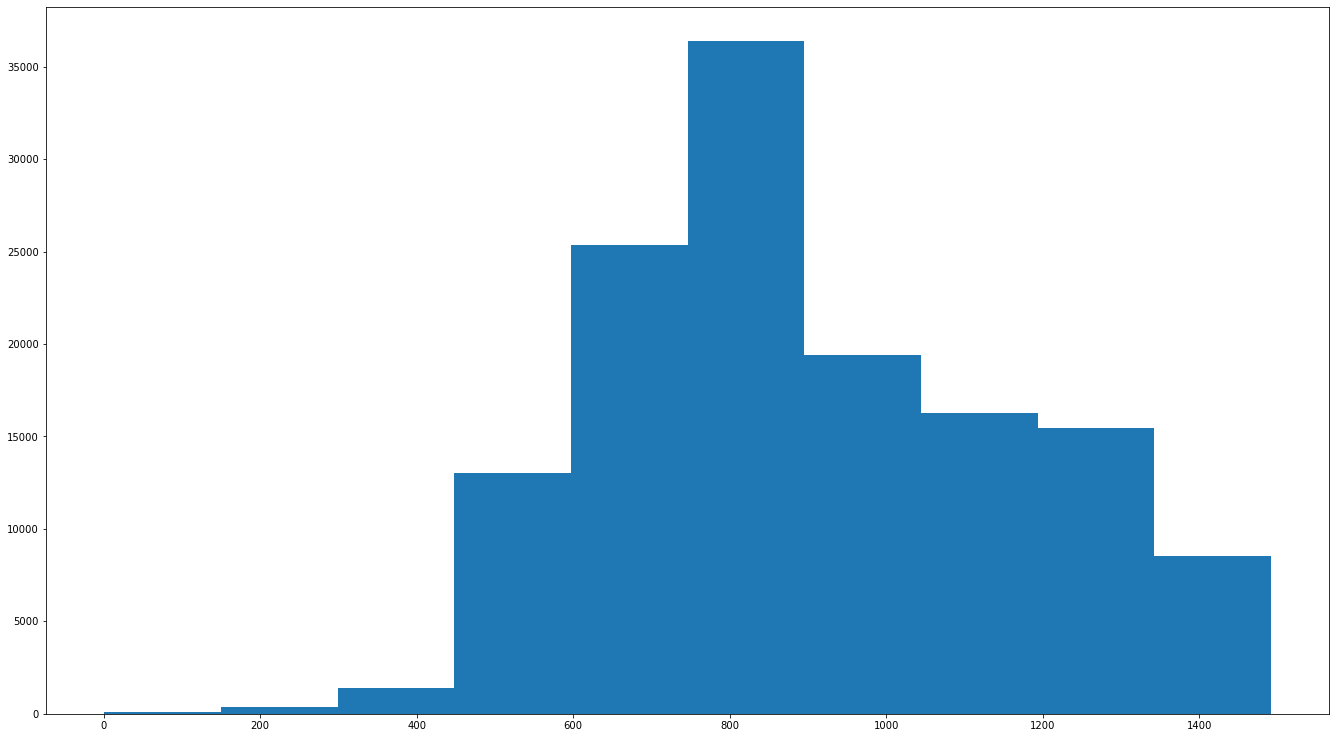

In [182]:
c = df2["surface_covered"].copy()

min = c.min()
max = c.max()

c = np.array(c).reshape(-1,1)

c = MinMaxScaler(feature_range=(1,2)).fit_transform(c)

c = PowerTransformer(method='box-cox', standardize=True).fit_transform(c) #Escalado

c = MinMaxScaler(feature_range=(min,max)).fit_transform(c)

c = np.float32(c)

plt.figure(figsize=(23,13))
plt.boxplot(c) 
plt.show()
plt.figure(figsize=(23,13))
plt.hist(c) 
plt.show()
df2["surface_covered"] = c

###### Price

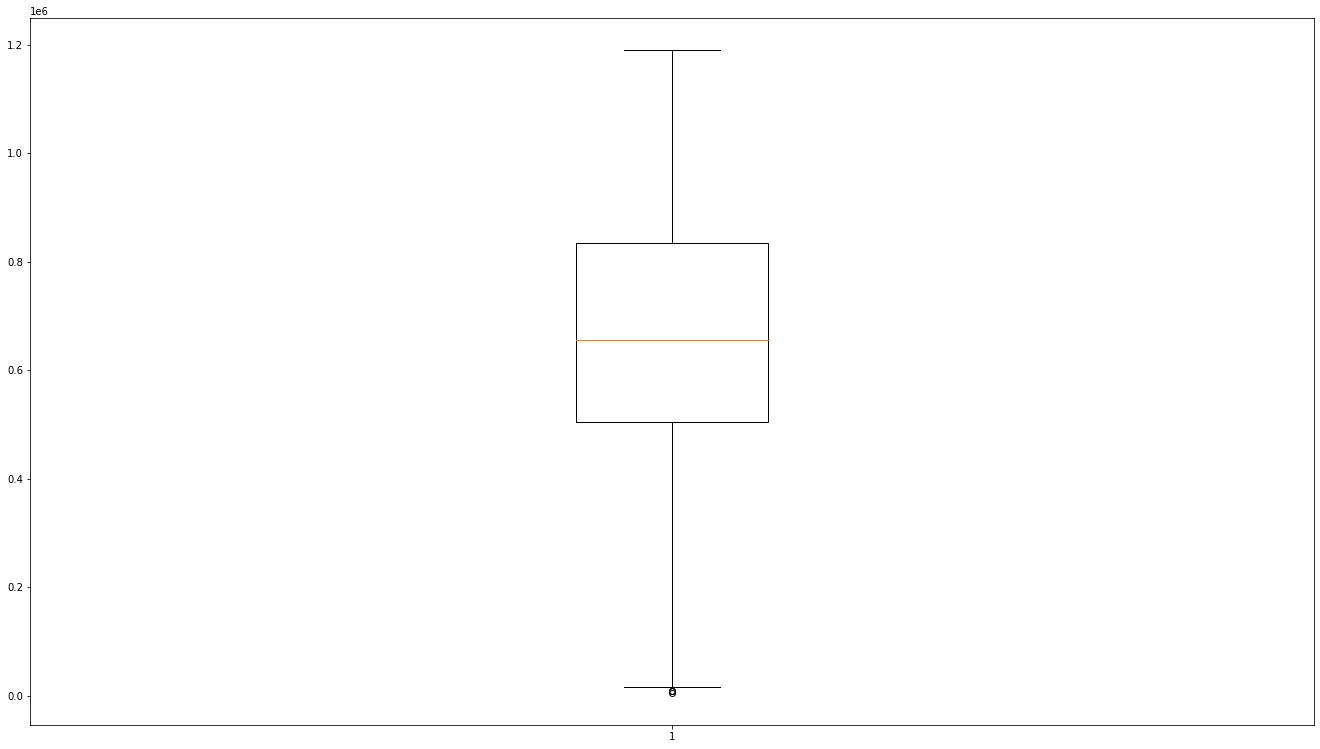

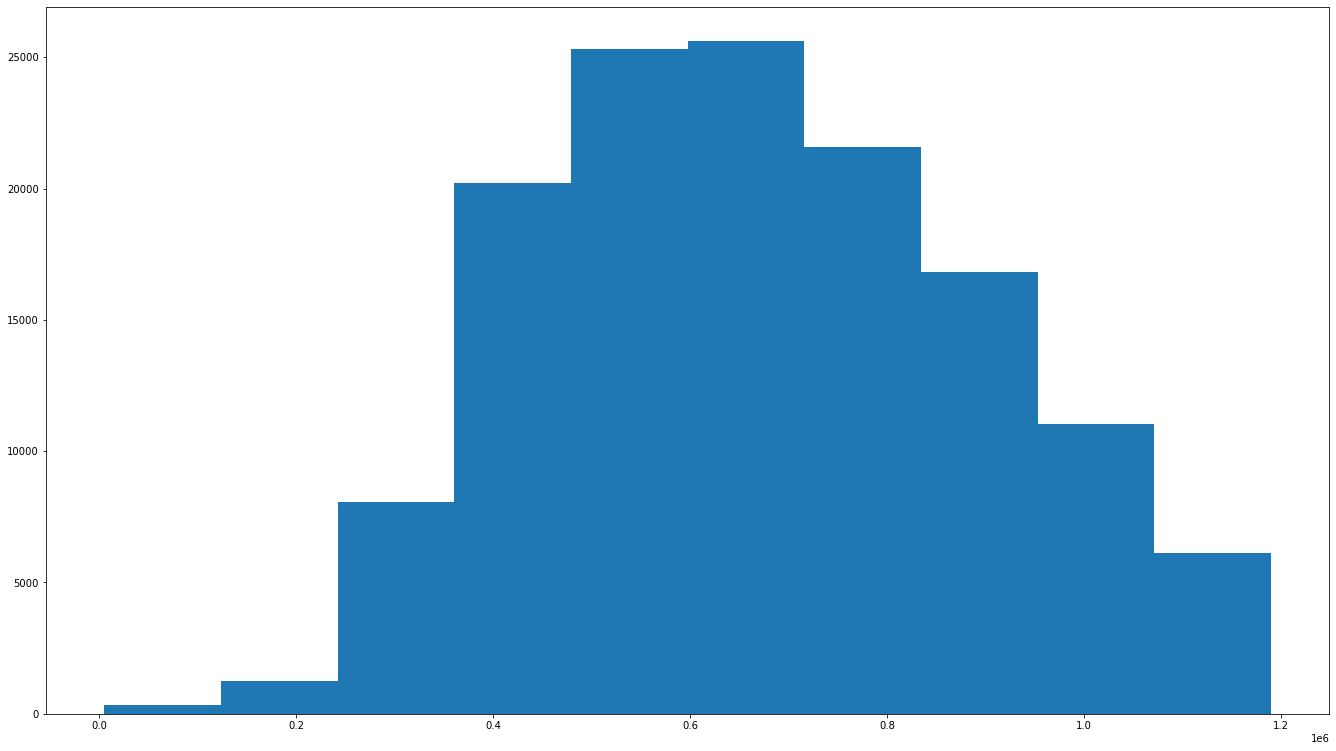

In [183]:
c = df2["price"].copy()

min = c.min()
max = c.max()

c = np.array(c).reshape(-1,1)

c = MinMaxScaler(feature_range=(1,2)).fit_transform(c)

c = PowerTransformer(method='box-cox', standardize=True).fit_transform(c) #Escalado

c = MinMaxScaler(feature_range=(min,max)).fit_transform(c)

c = np.float32(c)

plt.figure(figsize=(23,13))
plt.boxplot(c) #Diagrama de caja
plt.show()
plt.figure(figsize=(23,13))
plt.hist(c) #Histograma
plt.show()
df2["price"] = c

In [184]:
#Agregamos esta linea para trabajar en el proyecto 4
df4 = df2.copy()

##### Variables Dummies para Property_type

Vamos a ver los valores que tiene la variable Property_type

In [185]:
df2.property_type.value_counts()

Departamento       102129
Casa                17677
PH                  13591
Lote                 1084
Oficina               621
Local comercial       287
Casa de campo         264
Cochera               259
Otro                  230
Depósito              199
Name: property_type, dtype: int64

Vamos a utilizar los de mayor frecuencia para generar las variables dummies

In [186]:
df2 = df2[(df2["property_type"] == "Departamento") | (df2["property_type"] == "PH") | 
              (df2["property_type"] == "Casa")]


In [187]:
df2 = pd.get_dummies(df2, columns=['property_type'])
df2.head()

,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,2595.202393,809.531921,653266.5000,0,0,1
2,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,1828.292236,678.467163,554938.6875,0,0,1
3,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,2982.006104,731.751587,907156.8125,0,0,1
4,La Plata,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,1995.198120,559.813599,206103.1875,0,0,1
5,Villa Crespo,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,2186.193604,790.903381,629024.1875,0,0,1


Como resultado generamos 3 variables que tienen 1 o 0 segun el valor que tenian en la columna original 

Podríamos hacer lo mismo con las variables L3 y L2 pero al tener el mismo objetivo(ubicación de la propiedad), comprendo es suficiente iniciamente con avanzar con las caracteristicas de latitud y longitud

###### Finalmente haremos un grafico para analizar la correlacion de las variables

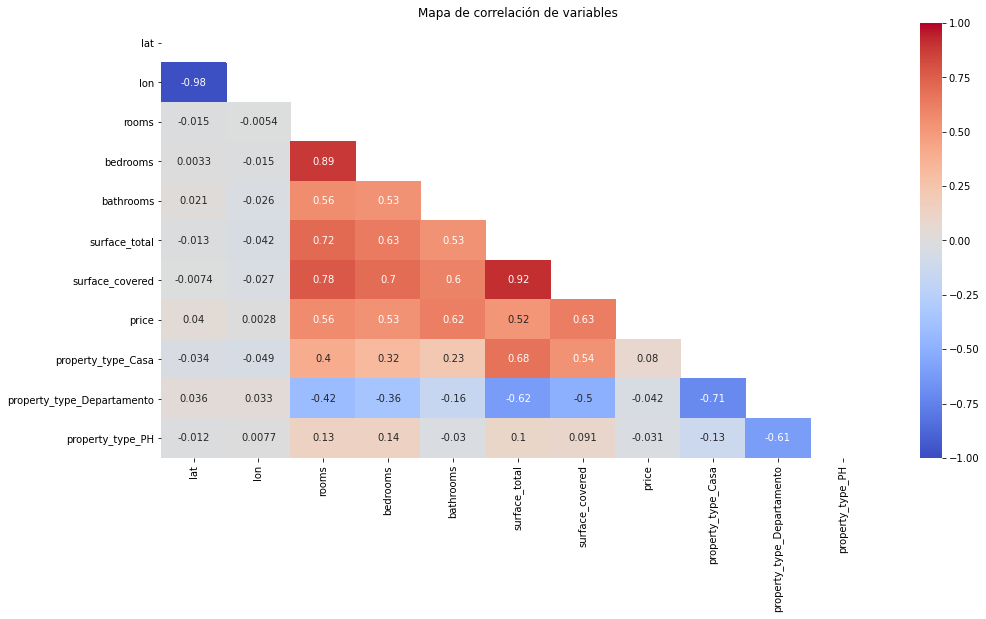

In [43]:
#Se estudia la correlación
maskd = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
plt.figure(figsize=(16, 8))
plt.title('Mapa de correlación de variables')
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, mask=maskd, cmap= 'coolwarm', annot=True)

###### Es posible ver que los features que se encuentran con mayor correlación con el precio, rondan todos en valores similares, desde 0,5 hasta 0,61. Por lo tanto, nos quedaremos con Rooms, Bedrooms, Bathrooms, surface_total y surface_covered

##### Para reentrenar el modelo del proyecto 1 y comparar con el nuevo dataset, lo haremos siempre utilizando las siguientes metricas

#### Metricas Elegidas
##### MAE
El Error Absoluto Medio (Mean Absolute Error o MAE) se define como:

![image-5.png](attachment:image-5.png)
 
MAE es la diferencia absoluta entre el valor objetivo y el valor predicho por el modelo. Es más robusto a los valores atípicos y no penaliza los errores extremadamente. MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual.


##### R2

El coeficiente de determinación (R2 o R-squared) mide la porción de la varianza de la variable objetivo que se puede explicar por el modelo.

R2 tiene un valor máximo de 1 (cuando el modelo explica toda la varianza) , aunque puede tener valores negativos.

![image-3.png](attachment:image-3.png)

Un problema importante que tiene R2 es que no nos indica si el modelo explica la varianza debido a que está sobreajustado (overfitted). Por eso una medida mejor es el Coeficiente de Determinacion ajustado (Adjusted R-squared), que tiene en consideracion la complejidad del modelo.

![image-4.png](attachment:image-4.png)1−(1−R2)(n−1)(n−k−1)
 
##### Raíz del Error Cuadrático Medio

La Raíz del Error Cuadrático Medio (Root Mean Squared Error o RMSE) se diferencia del MSE en que el resultado se puede medir en las mismas unidades que la variable objetivo

![image-2.png](attachment:image-2.png)
 
Sin embargo, tiene un problema y es que da más importancia a los errores grandes. Se prefiere más en algunos casos porque los errores se elevan primero al cuadrado antes de promediar, lo que supone una gran penalización en los errores grandes. Esto implica que RMSE es útil cuando no se desean errores grandes.


#### Comenzamos...

El MAE en train es: 55569.288927404305
El MAE en test es: 66502.71569689398
-------------------------------------------
El RMSE en train es: 78758.1929858882
El RMSE en test es: 96524.1694141059
-------------------------------------------
El r2 de train es: 0.8718185111949104
El r2 de test es: 0.8076665024120939
-------------------------------------------
El r2 ajustado de train es: 0.8718047822690911
El r2 ajustado de test es: 0.8076184298540225


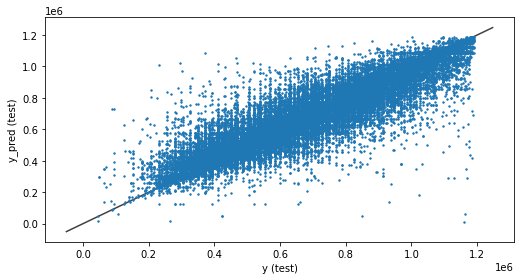

In [44]:
# Se genera la función y = F(xa)
#Las variables Predictoras que utilizaremos son "Rooms, Surface_total y Surface_covered", "Bedrooms", "Bathrooms", 
# las cuales han tenido los mayores valores de correlación.

X = df2[["lat","lon", "rooms", "surface_total", "surface_covered", "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"]]


#Variable a Precio
y = df2["price"]

#Realizamos Train - Test - split de los datos.
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

arbol_optimo_p1 = DecisionTreeRegressor(max_depth= 13,random_state=42)
arbol_optimo_p1.fit(X_train,y_train)

y_train_pred= arbol_optimo_p1.predict(X_train)
y_test_pred= arbol_optimo_p1.predict(X_test)

MAE_train=mean_absolute_error(y_train,y_train_pred)
MAE_test=mean_absolute_error(y_test,y_test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",MAE_train)
print("El MAE en test es:",MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",RMSE_train)
print("El RMSE en test es:",RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",r2_train)
print("El r2 de test es:",r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",adj_r2_train)
print("El r2 ajustado de test es:",adj_r2_test)


plt.figure(figsize = (14,4))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

##### Aqui los valores obtenidos en el Proyecto 1

Modelo: Árbol de Decisión

R2 en Train: 0.8681638840333408

R2 ajustado en train: 0.868156909684509

R2 en test: 0.7073916954230887

R2 ajustado en Test: 0.7073555739140058

RMSE en train: 108020.97291653392

RMSE en test: 163520.4045165368

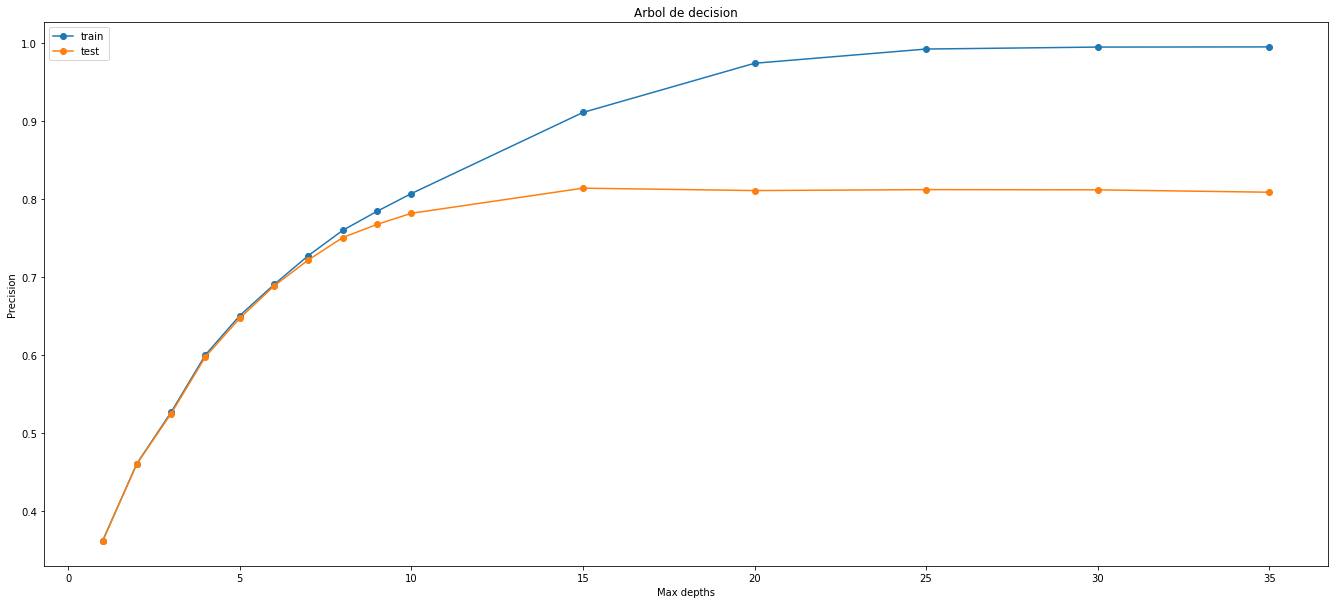

In [45]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de x que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35]

# Generamos un loop sobre los distintos valores de x
for x in max_depths:
    
    # Vamos a repetir el siguiente bloque de código

    tree = DecisionTreeRegressor(random_state=42,max_depth=x)
    
    # Entrenar el modelo
    tree.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    train_acc = r2_score(y_train,tree.predict(X_train))
    
    # Predecir y evaluar sobre el set de evaluación
    test_acc = r2_score(y_test,tree.predict(X_test))
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

plt.figure(figsize=(23,10))
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel("Max depths")
plt.ylabel("Precision")
plt.title("Arbol de decision")
plt.show()

###### Conclusión:
Claramente se puede ver que el modelo mejora increiblemente, la inclusión de las nuevas variables trabajadas ademas del trabajo realizado en el dataset han sido una cualidad que no me lo esperaba en esa dimensión.

##### PARTE B

M2 - MRP-ElsaticNetCV

Realizaremos un modelo con "Regresión Polinomial" y utilizaremos un modelo ElasticNetCV que cuenta con los modelos Lasso y Ridge en su estructura ademas de Validación Cruzada. Se trata de un modelo Hibrido.

In [46]:

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNetCV


X_p = df2[["lat","lon", "rooms", "surface_total", "surface_covered", "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"]]

#Variable a Precio
y_p = df2["price"]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.30,random_state=42)

poly = PolynomialFeatures(degree = 3, include_bias=True) 
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.fit_transform(X_test_p)

regr = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], max_iter=1000, tol=0.001, cv=5, random_state=0)
regr.fit(X_train_poly, y_train_p)

print(regr.coef_)




[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000

In [47]:
print('Optimal alpha: %.8f'%regr.alpha_)
print('Optimal l1_ratio: %.3f'%regr.l1_ratio_)



Optimal alpha: 4334113533543.42968750
Optimal l1_ratio: 1.000


L1_ratio = 1 significa que el modelo esta utilizando Lasso

Ahora entrenamos con los mejores valores 

In [48]:
regr_optimizado = ElasticNetCV(l1_ratio=regr.l1_ratio_, alphas = regr.alphas_, fit_intercept=True, tol=0.001, normalize = True)
regr_optimizado.fit(X_train_poly, y_train_p)

ElasticNetCV(alphas=array([[4.33411353e+16, 4.04200879e+16, 3.76959092e+16, 3.51553311e+16,
        3.27859795e+16, 3.05763142e+16, 2.85155729e+16, 2.65937188e+16,
        2.48013911e+16, 2.31298604e+16, 2.15709852e+16, 2.01171730e+16,
        1.87613429e+16, 1.74968911e+16, 1.63176592e+16, 1.52179036e+16,
        1.41922678e+16, 1.32357565e+16, 1.23437108e+16, 1.15117860e+16,
        1.07359302e+16, 1.00123...
        2.15709852e+13, 2.01171730e+13, 1.87613429e+13, 1.74968911e+13,
        1.63176592e+13, 1.52179036e+13, 1.41922678e+13, 1.32357565e+13,
        1.23437108e+13, 1.15117860e+13, 1.07359302e+13, 1.00123644e+13,
        9.33756455e+12, 8.70824395e+12, 8.12133745e+12, 7.57398649e+12,
        7.06352515e+12, 6.58746719e+12, 6.14349395e+12, 5.72944302e+12,
        5.34329774e+12, 4.98317735e+12, 4.64732788e+12, 4.33411353e+12]]),
             l1_ratio=1.0, normalize=True, tol=0.001)

In [49]:
# r2 score on training dataset
print(r2_score(y_train_p, regr_optimizado.predict(X_train_poly)))
print(r2_score(y_test_p, regr_optimizado.predict(X_test_poly)))



-1.7151831066541945e-09
-0.00010470062918432887


Luego de probar con varios números o grados de polinomio, los valores no cambian y tan solo empeoran. Realmente se trata de valores que implica que este modelo no sirve.

#### M3 - Modelo Random Forest Regressor

In [50]:
# - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

X_p = df2[["lat","lon", "rooms", "surface_total", "surface_covered", "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"]]

#Variable a Precio
y_p = df2["price"]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.30,random_state=42)

poly = PolynomialFeatures(degree = 3, include_bias=False) 
#X_train_poly = poly.fit_transform(X_train_p)
#X_test_poly = poly.fit_transform(X_test_p)



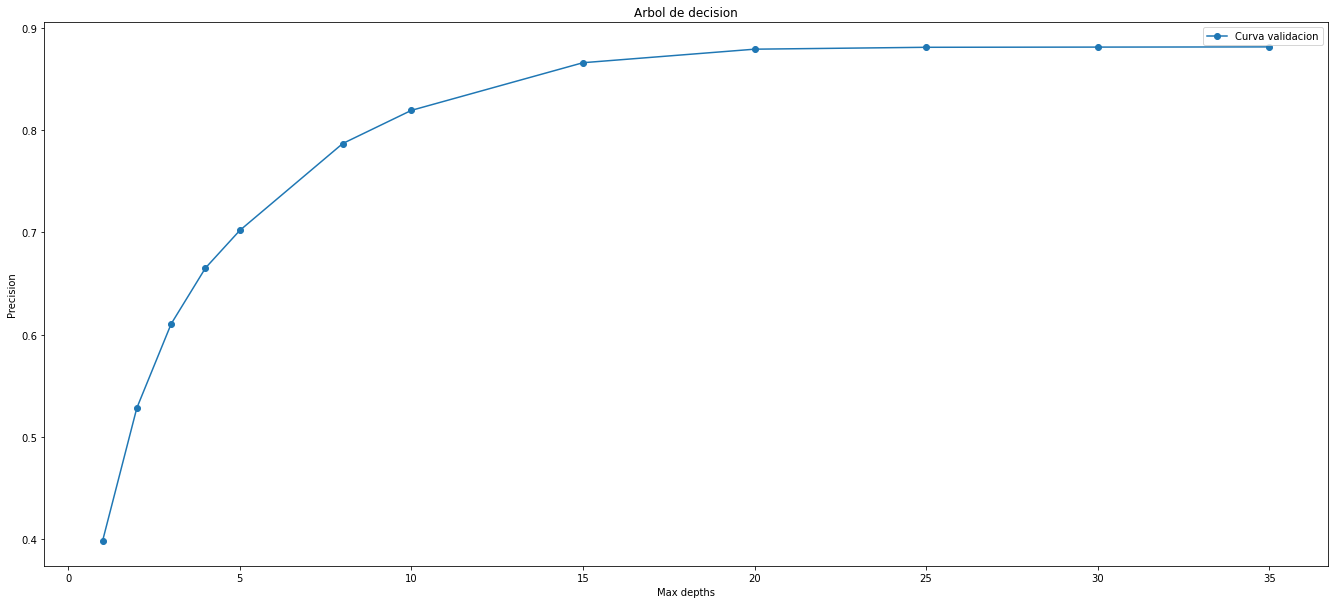

In [54]:

lista_accuracy = []
# Definimos la lista de valores de x que vamos a explorar
max_depths = [1,2,3,4,5,8,10,15,20,25,30,35]

# Generamos un loop sobre los distintos valores de x
for x in max_depths:
    
  
  # tree = RandomForestRegressor(random_state=42,max_depth=x)
    
  #lista_accuracy.append(np.mean(cross_val_score(tree, X_train_poly, y_train_p, cv=5, n_jobs=-1)))
   
  lista_accuracy = [0.3981114321433764, 0.528370232424707, 0.610574725485711, 0.6652388377106193, 0.7019780755247583, 0.7869743894373317, 0.819403316158388, 0.8660043361263925, 0.8792398952320581, 0.8810957879562149, 0.8812820926656088, 0.881466491443976]


plt.figure(figsize=(23,10))
plt.plot(max_depths,lista_accuracy,'o-',label='Curva validacion')
plt.legend()
plt.xlabel("Max depths")
plt.ylabel("Precision")
plt.title("Arbol de decision")
plt.show()



In [55]:
print(lista_accuracy)


[0.3981114321433764, 0.528370232424707, 0.610574725485711, 0.6652388377106193, 0.7019780755247583, 0.7869743894373317, 0.819403316158388, 0.8660043361263925, 0.8792398952320581, 0.8810957879562149, 0.8812820926656088, 0.881466491443976]


In [56]:

tree = RandomForestRegressor(random_state=42,max_depth=20)

tree.fit(X_train_poly, y_train_p)

RandomForestRegressor(max_depth=20, random_state=42)

In [57]:
#Obtenemos los nombres de las variables para poder identificarlas
namespoly = poly.get_feature_names(["lat","lon", "rooms", "surface_total", "surface_covered", "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"])
type(namespoly)
namesp = np.array(namespoly)


In [58]:
tree.feature_importances_
type(tree.feature_importances_)


numpy.ndarray

<BarContainer object of 285 artists>

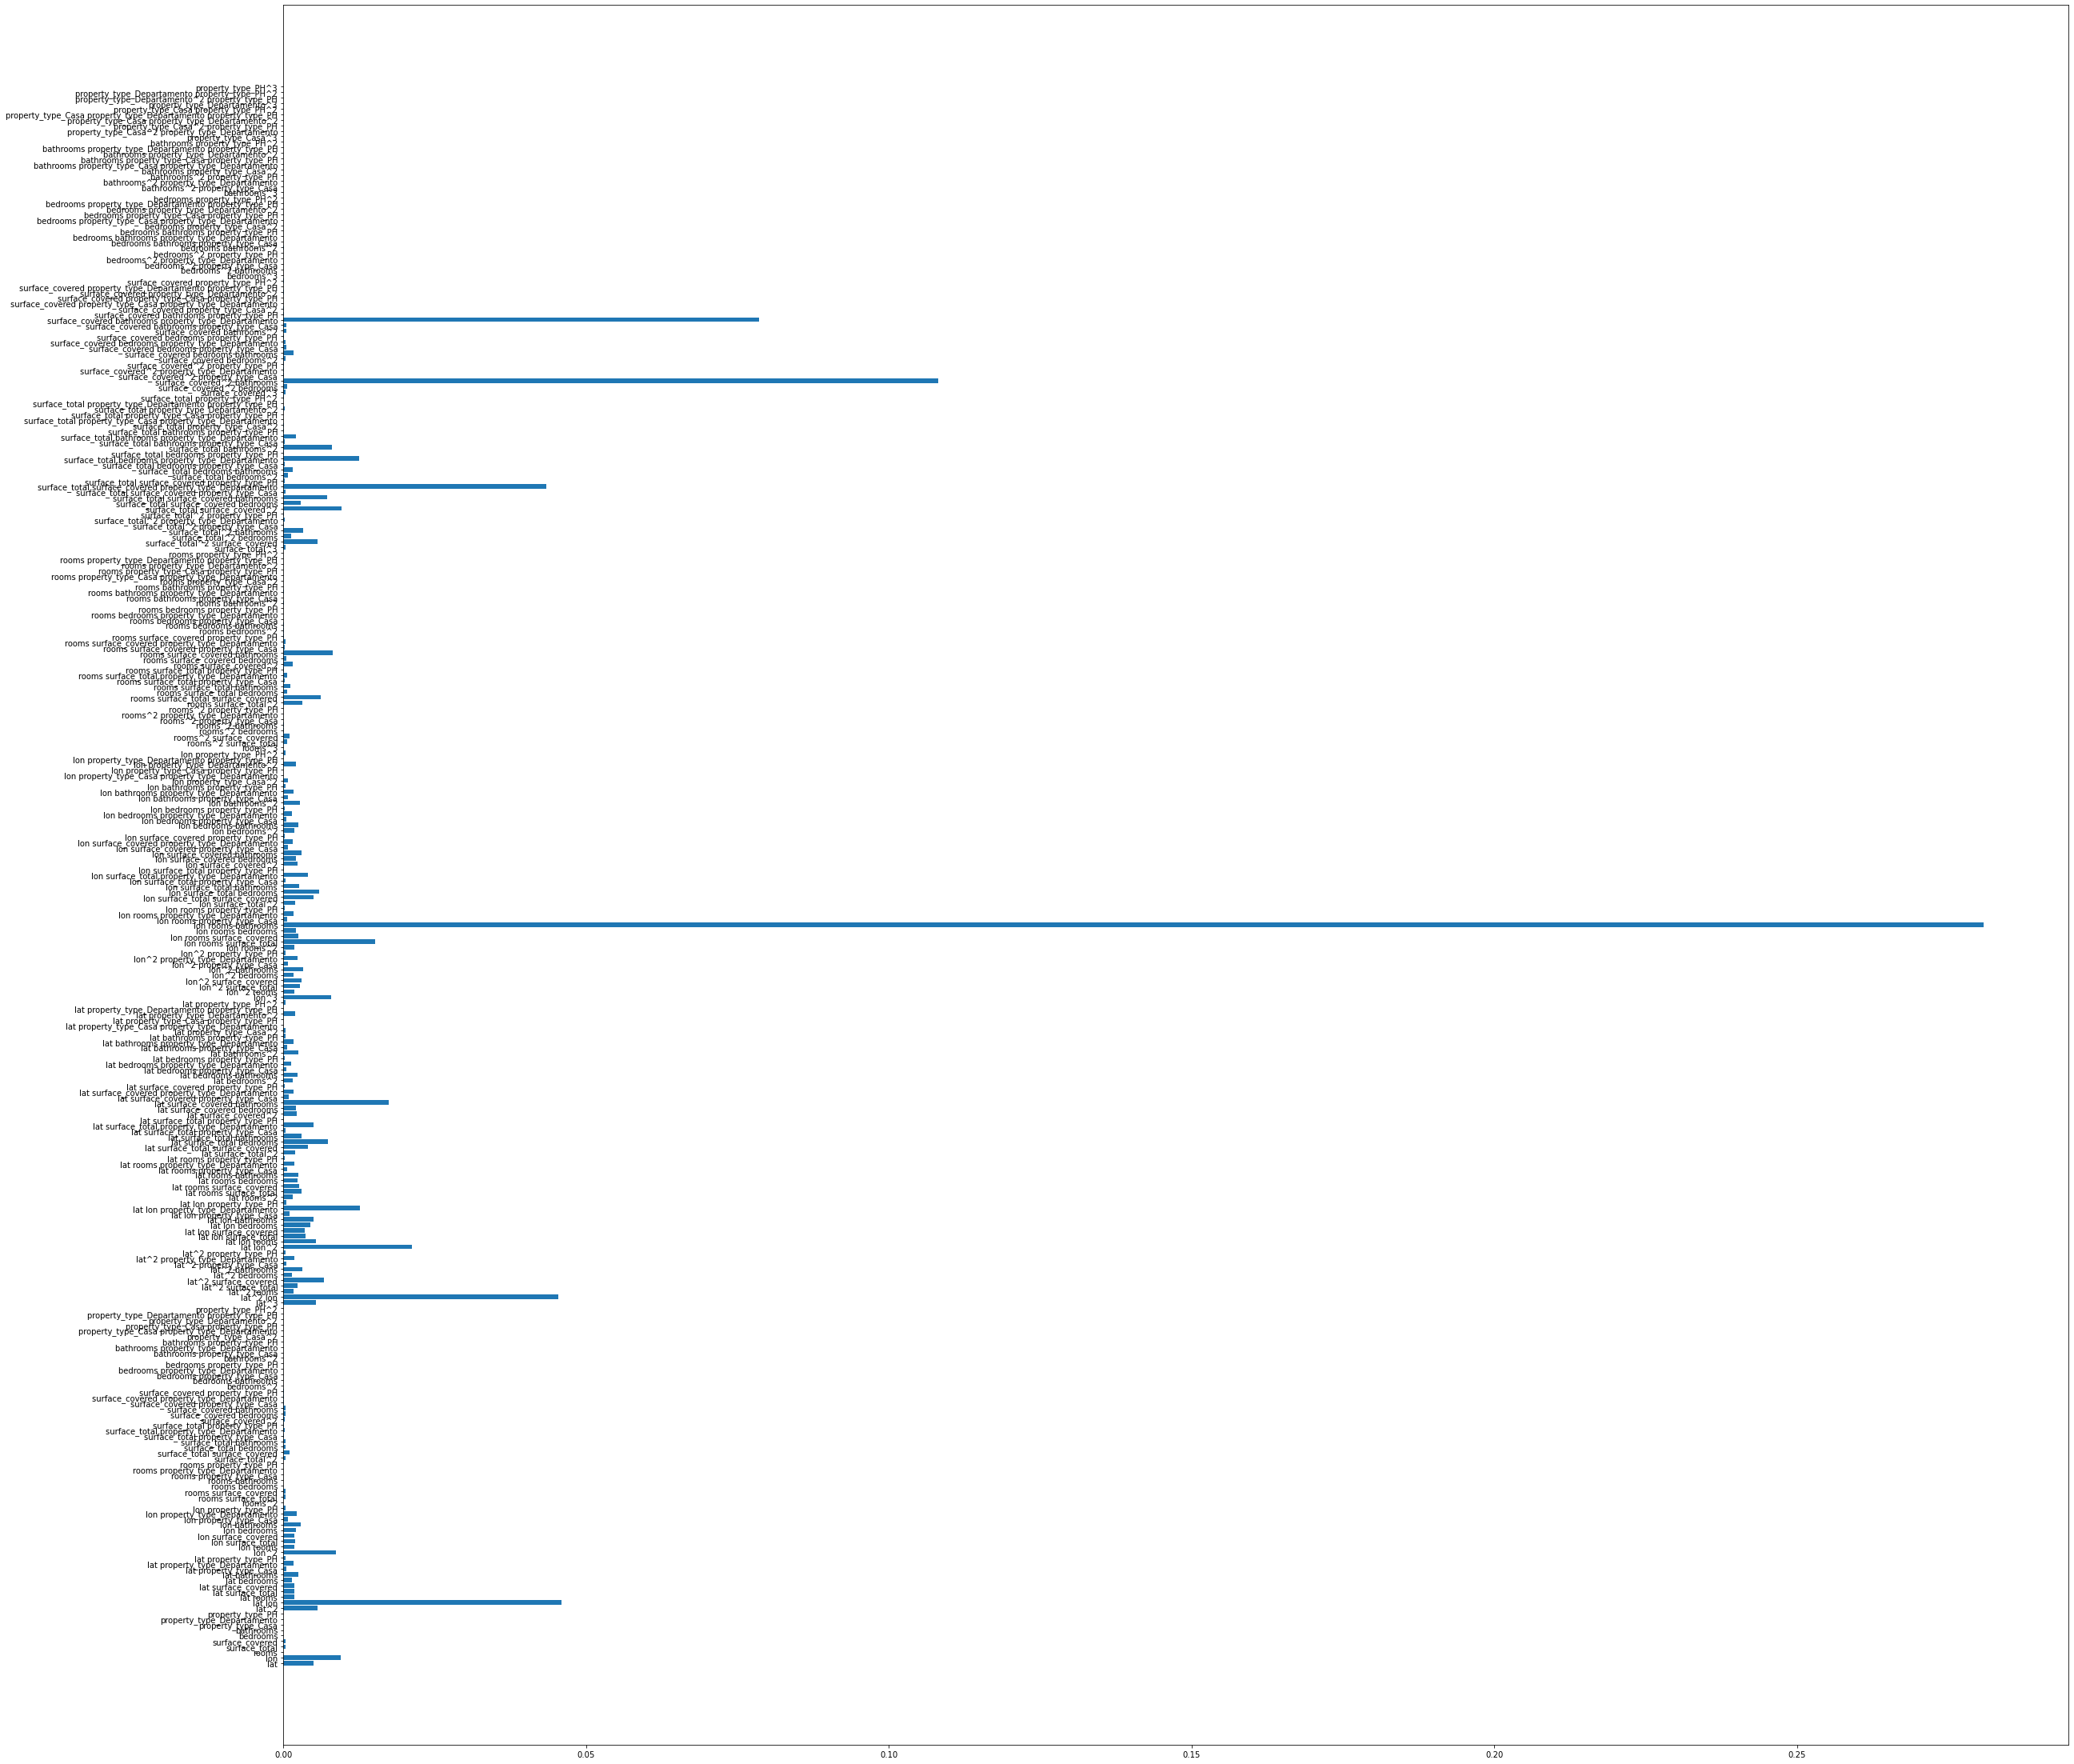

In [70]:
plt.figure(figsize=(40,40))
plt.barh(namesp, tree.feature_importances_)

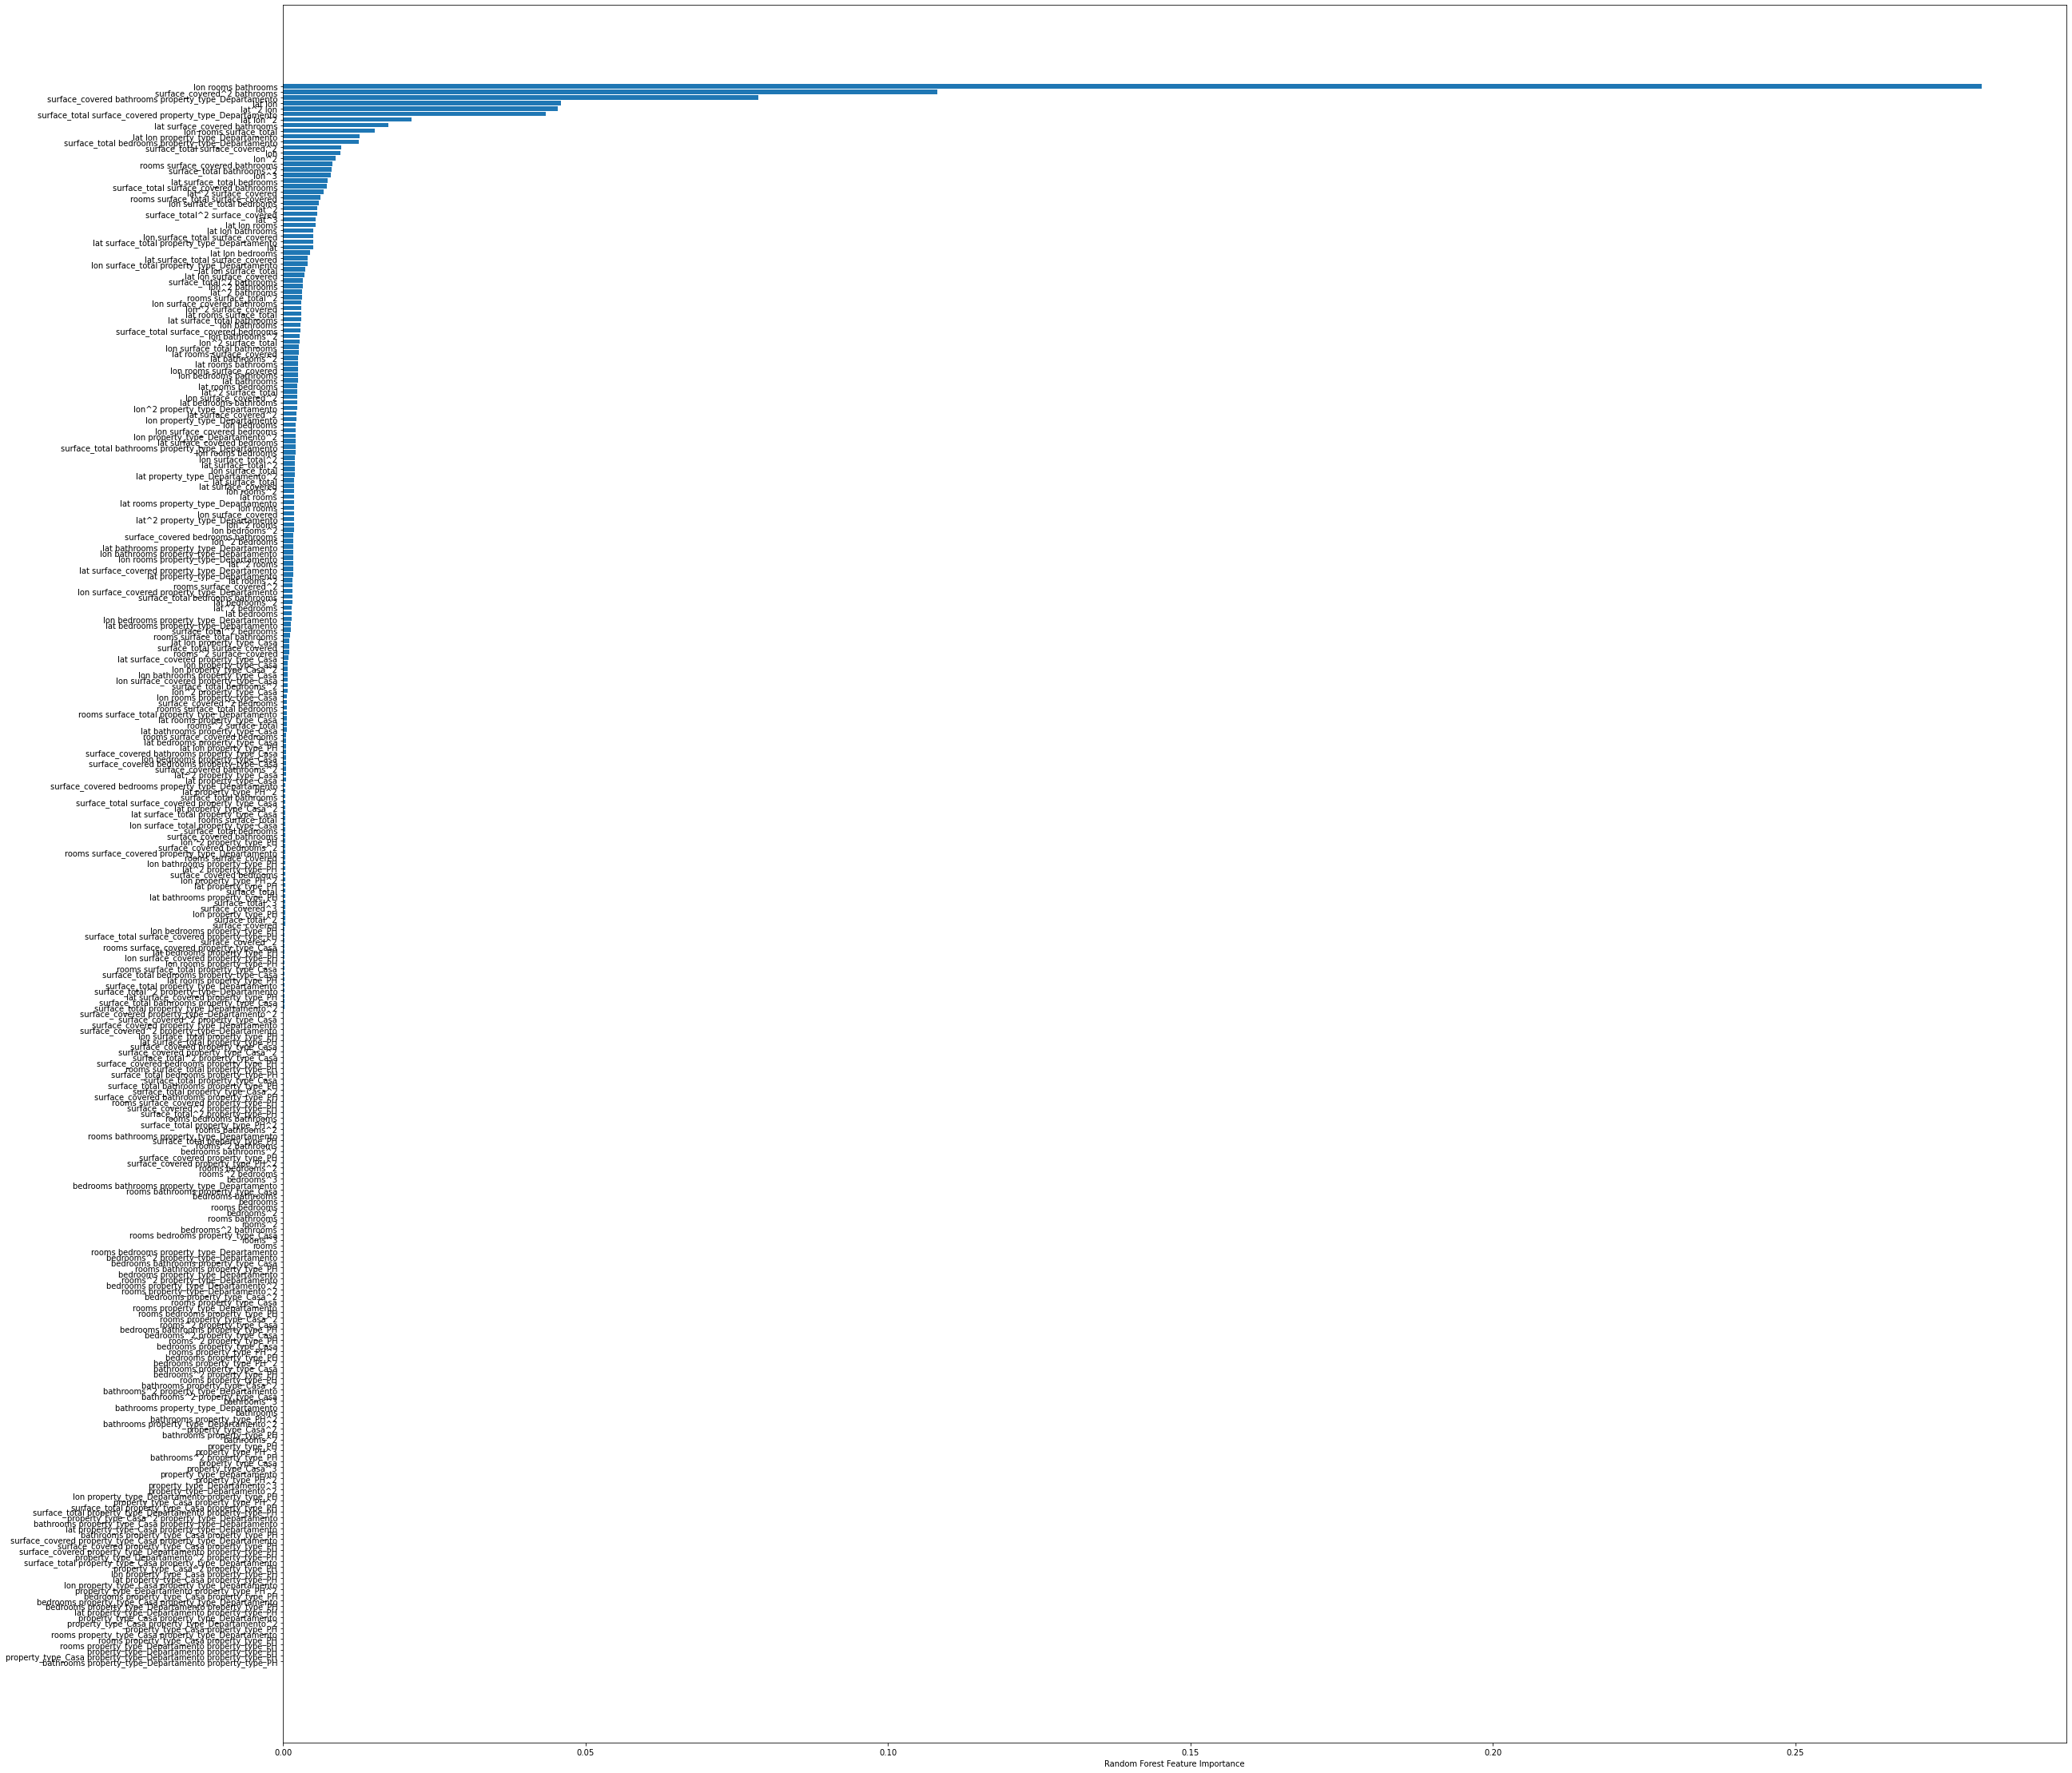

In [71]:
#Ordenamos el Grafico
sorted_idx =[]
sorted_idx = tree.feature_importances_.argsort()
plt.figure(figsize=(40,40))
plt.barh(namesp[sorted_idx], tree.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.savefig("grafico.png")

Vamos a Filtrar los valores mayores a 0,035 para comprender el grafico


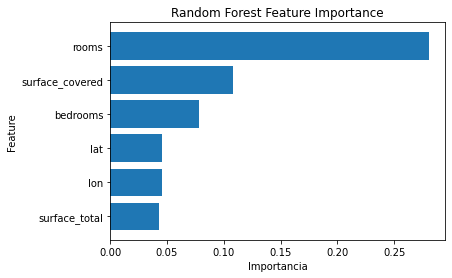

In [89]:
tree.feature_importances_ > 0.035
mayor_35 = tree.feature_importances_ > 0.035
filtrado = tree.feature_importances_[mayor_35]

sorted_idx2 =[]
sorted_idx2 = filtrado.argsort()


parameters = {'axes.labelsize': 10,
          'axes.titlesize': 10}
plt.barh(namesp[sorted_idx2], filtrado[sorted_idx2])
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.title("Random Forest Feature Importance")
plt.savefig("grafico.png")

Se puede ver aqui la importancias de las variables donde Latitud y Longitud ingresan dentro del top 6 

#### M4 - XG BOOST

In [90]:
import xgboost
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [91]:
X_p = df2[["lat","lon", "rooms", "surface_total", "surface_covered", "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"]]

#Variable a Precio
y_p = df2["price"]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.30,random_state=42)

poly = PolynomialFeatures(degree = 3, include_bias=False) 
#X_train_poly = poly.fit_transform(X_train_p)
#X_test_poly = poly.fit_transform(X_test_p)


print(X_train_poly.shape)
print(y_train_p.shape)

(93377, 285)
(93377,)


In [92]:
xgb_model = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)

params = {
    "colsample_bytree": uniform(0.3, 0.5),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3 
    "n_estimators": randint(100, 150), # default 100 
    "subsample": uniform(0.1, 0.6) 
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train_poly, y_train_p)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C7A80D5190>,
                                        'max_depth': <sci

In [93]:
#Mejores parámetros
#search.best_params_

{'colsample_bytree': 0.4743329936458647,
 'gamma': 0.04808827554571038,
 'learning_rate': 0.31215697934688114,
 'max_depth': 5,
 'n_estimators': 138,
 'subsample': 0.6620379932420407}

Mejores Parametros

{'colsample_bytree': 0.4743329936458647,
 'gamma': 0.04808827554571038,
 'learning_rate': 0.31215697934688114,
 'max_depth': 5,
 'n_estimators': 138,
 'subsample': 0.6620379932420407}

In [94]:
#Mejor Score
#search.best_score_

0.839997385658983

##### Mejor Score - 0.839997385658983

Obtenemos un muy buen valor de Score.

In [95]:
#Ejecutamos el Modelo con los valores optimos
poly = PolynomialFeatures(degree = 3, include_bias=False) 
X_poly =poly.fit_transform(X_p)

xgb_model = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42, colsample_bytree = 0.4743329936458647, gamma = 0.04808827554571038, learning_rate = 0.31215697934688114, max_depth = 5, n_estimators = 138, subsample = 0.6620379932420407)

xgb_model.fit(X_poly, y_p)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4743329936458647,
             gamma=0.04808827554571038, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.31215697934688114,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=138, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6620379932420407, tree_method='exact',
             validate_parameters=1, verbosity=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

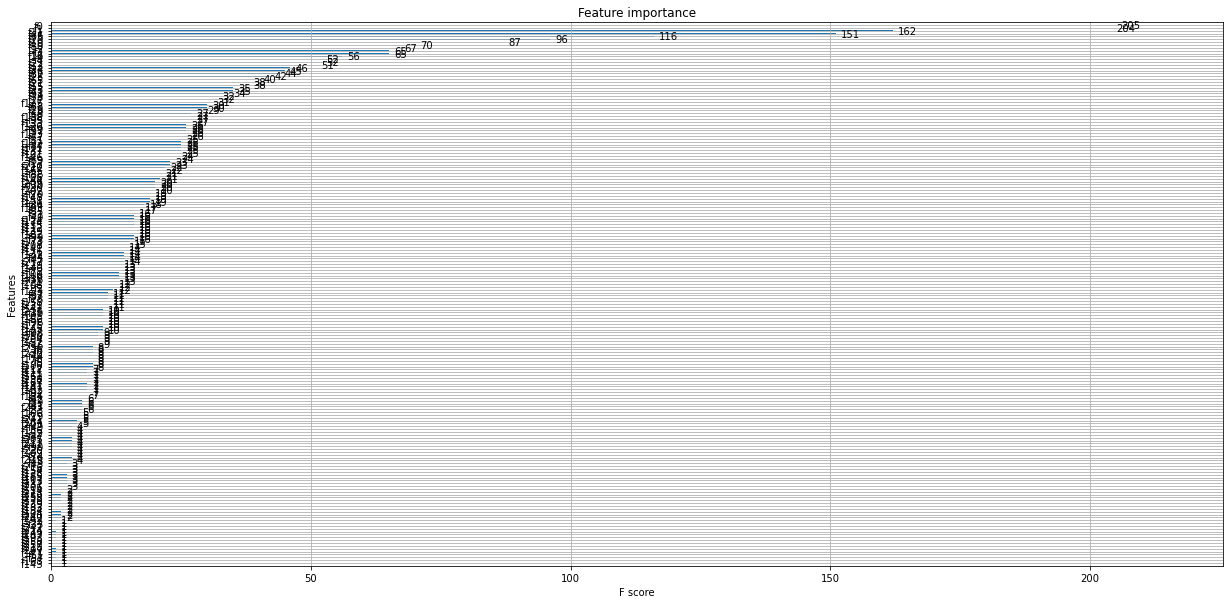

In [96]:
#Graficamos las Importancias de las variables
fig, ax = plt.subplots(1,1,figsize=(21,10))
xgboost.plot_importance(booster=xgb_model, ax=ax)

Text(0.5, 0, 'XGBoost Feature Importance')

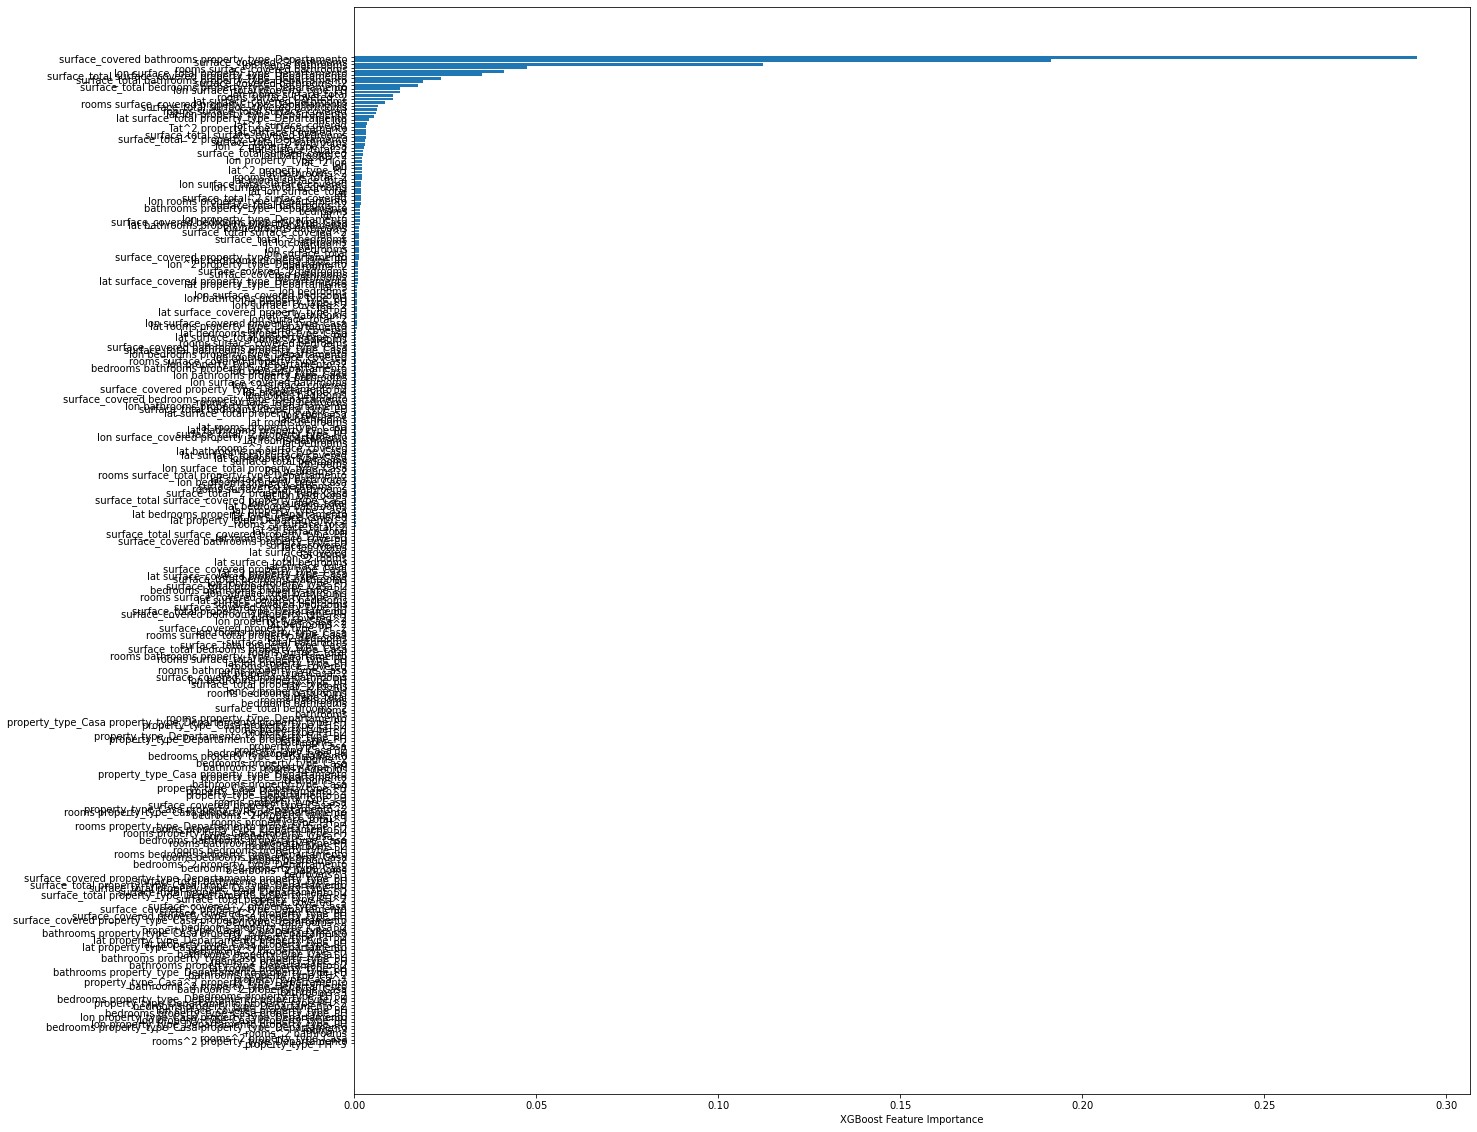

In [100]:
#Grafico Con nombres de variables y ordenado

namespoly = poly.get_feature_names(["lat","lon", "rooms", "surface_total", "surface_covered", "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"])
type(namespoly)
namesp = np.array(namespoly)


sorted_idx =[]
sorted_idx = xgb_model.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(namesp[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")


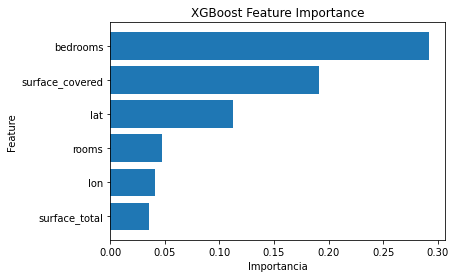

In [101]:
xgb_model.feature_importances_ > 0.035
mayor_35 = xgb_model.feature_importances_ > 0.035
filtrado = xgb_model.feature_importances_[mayor_35]

sorted_idx2 =[]
sorted_idx2 = filtrado.argsort()


parameters = {'axes.labelsize': 10,
          'axes.titlesize': 10}
plt.barh(namesp[sorted_idx2], filtrado[sorted_idx2])
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.title("XGBoost Feature Importance")
plt.savefig("grafico.png")


Finalmente obtenemos las variables mas importantes (top 6) y nuevamente Latitud y Longitud se encuentran ese listado.

#### PARTE C - Interpretacion de Modelos

Finamente podemos concluir que hemos generado un muy buen modelo de benchmark y 2 otros buenos modelos avanzados. Tanto XG BOOST como Random Forest Regressor obtuvieron resultados por encima de 0,85 pero si tuviera que legir uno obviamente eligiria el de mayor que fue el segundo mencionado. 
De todas maneras el modelo de benchmark claramente ha generado buena aproximación al modelo y en terminos de recursos computacionales es un modelo a considerar. El analisis de desarrollo de los otros demandó muchisimo tiempo de procesamiento de maquina a mi criterio y poca experiencia.

##### Importancia de Variables

XGBOOST:
    _Bedrooms
    
    _Surface_covered
    
    _Lat
    
    _Rooms
    
    _Lon
    
    _Surface_total

Random Forest Regressor:
    _Rooms
    
    Surface_covered
    
    Bedrooms
    
    Lat
    
    Lon
    
    Surface_total

En conclusión, son las mismas variables en diferente orden. Claramente la ubicacion del inmueble es parte clave de la formulacion del precio como tambien su composición o infraestructura.

#### Errores de los modelos

##### Random Forest Regressor

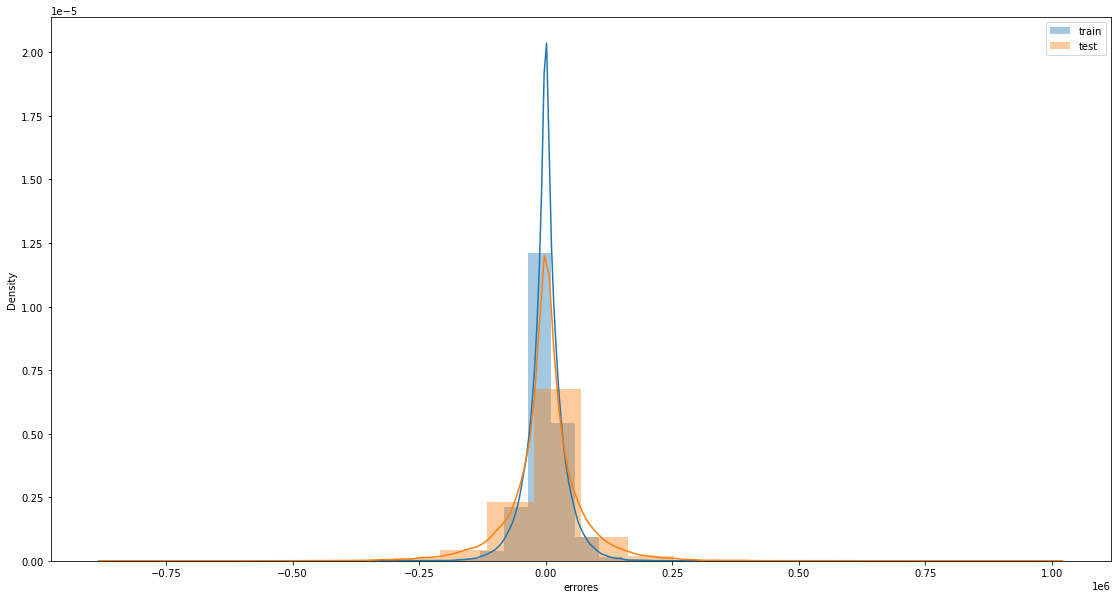

In [110]:
X_p = df2[["lat","lon", "rooms", "surface_total", "surface_covered", "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"]]

y_p = df2["price"]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.30,random_state=42)
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.fit_transform(X_test_p)

y_train_pred = tree.predict(X_train_poly)

y_test_pred = tree.predict(X_test_poly)

plt.figure(figsize=(19,10))

sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


##### XG BOOST

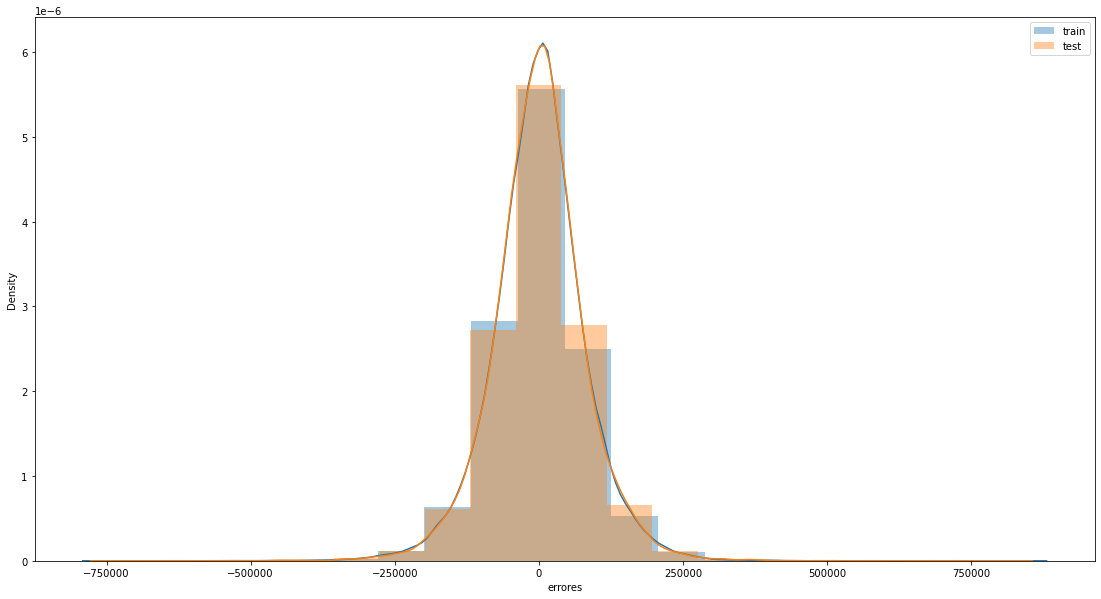

In [111]:
X_p = df2[["lat","lon", "rooms", "surface_total", "surface_covered", 
           "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"]]

y_p = df2["price"]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.30,random_state=42)

poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.fit_transform(X_test_p)

y_train_pred = xgb_model.predict(X_train_poly)

y_test_pred = xgb_model.predict(X_test_poly)

plt.figure(figsize=(19,10))

sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

#### Ser Critico con la metodología Utilizada

Claramente el hecho de trabajar con modelos que requieren demasiado tiempo para obtener un resultado mientras probas, trabajar con google colab, por momentos generó un delay entre la idea y el resultado producto que cada prueba duraba mas de 1 hora y cuando regresaba, se me desconectaba. Obviamente debo encontrar la manera de hacer mas livianos los modelos y quizas con probar una vez y ver las variables de importancia, me daba cuenta que eran en su potencia original, eso podría haberme hecho simplicar el modelo y hasta no era necesario quizas un polinomio de grado 2. Ir por un grado 3 fue totalmente excesivo a mi criterio. Leccion Aprendida 100%.

De todas maneras, fue un proyecto que me desafió de principio a fin y en todas las aristas. La ganancia es total porque si cuesta, se aprende. 

Por otro lado uno va encontrando las mejores maneras de buscar información sobre problemas que surgen mientras uno programa como tambien el hecho de reciclar algunas lineas de las notebook de clases han sido de gran ayuda.

# PROYECTO 4

El proyecto tendrá 2 aristas:

1- Encontrar preguntas que me quedaron pendientes en el proyecto anterior y me surgieron luego de haberlo entregado.

2- Generar una Red Neuronal - siendo esta mi primera vez, busco que tenga resultados razonables.

### 1 - Preguntas pendientes

##### 1-a - ¿Cuales son los barrios mas caros (5)?

##### 1-b- ¿Cuales son los barrios mas baratos (5)?

##### 1-b - ¿Como son las propiedades en comparación entre ambas? ¿Existe alguna diferencia arquitectonica o civil?

Iniciaremos el dataset anterior pero ya en el estadío de sin valores faltantes

In [255]:
df4.head()

,property_type,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,s_m2,p_m2
1,PH,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,2595.202393,809.531921,653266.5000,25.952024,251.720825
2,PH,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,1828.292236,678.467163,554938.6875,18.282923,303.528442
3,PH,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,2982.006104,731.751587,907156.8125,29.820061,304.210236
5,PH,Villa Crespo,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,2186.193604,790.903381,629024.1875,21.861937,287.725739
6,PH,Villa Crespo,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,2595.202393,910.934937,654578.2500,25.952024,252.226288


In [256]:
df4 = df4[(df4["l2"] == "Capital Federal")]


Vamos a agregar la columna de p_m2 siendo esta el precio por metro cuadrado

In [257]:
df4["p_m2"] = df4 ["price"]/  df4 ["surface_total"]

In [258]:
df4.head()

,property_type,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,s_m2,p_m2
1,PH,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,2595.202393,809.531921,653266.5000,25.952024,251.720825
2,PH,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,1828.292236,678.467163,554938.6875,18.282923,303.528442
3,PH,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,2982.006104,731.751587,907156.8125,29.820061,304.210236
5,PH,Villa Crespo,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,2186.193604,790.903381,629024.1875,21.861937,287.725739
6,PH,Villa Crespo,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,2595.202393,910.934937,654578.2500,25.952024,252.226288


Vamos a Incluir una columna con la superficie_total en m2

In [259]:
df4["s_m2"] = df4 ["surface_total"]/ 100

In [260]:
df4.head()

,property_type,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,s_m2,p_m2
1,PH,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,2595.202393,809.531921,653266.5000,25.952024,251.720825
2,PH,Palermo,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,1828.292236,678.467163,554938.6875,18.282923,303.528442
3,PH,Palermo,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,2982.006104,731.751587,907156.8125,29.820061,304.210236
5,PH,Villa Crespo,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,2186.193604,790.903381,629024.1875,21.861937,287.725739
6,PH,Villa Crespo,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,2595.202393,910.934937,654578.2500,25.952024,252.226288


In [261]:
table = pd.pivot_table(df4, values='p_m2', index=['l3'], aggfunc=np.mean)
tableprecios = table.sort_values('p_m2', ascending=False)
tableprecios

,p_m2
l3,
Agronomía,5303.982910
Parque Chas,4958.506348
Versalles,4761.244141
Villa Urquiza,4317.906738
Villa Devoto,1227.213989
Villa Lugano,970.474854
Parque Chacabuco,941.694580
Villa del Parque,809.021423
Almagro,807.778137


Sin conocer mucho el mercado inmobiliario de la Ciudad de Buenos Aires, es sabido que Puerto Madero deberia estar al menos en el top 5, por lo tanto tenemos algun valor que nos esta distorsionando los valores. 
Vamos a filtrar por percentiles 10 y 90 eliminando los valores extremos.

In [262]:
df4.p_m2.describe()

count     86638.000000
mean        587.962402
std       15350.246094
min           1.585965
25%         228.995285
50%         265.150299
75%         303.820465
max      996522.500000
Name: p_m2, dtype: float64

In [263]:
mask = df4['p_m2']
p10 = np.percentile(mask, 10)
p90 = np.percentile(mask, 90)

df4_filt = df4[(df4.p_m2 >= p10) & (df4.p_m2 <= p90)]

In [264]:
df4_filt.p_m2.describe()

count    69322.000000
mean       266.224182
std         37.684750
min        193.347076
25%        236.933502
50%        265.160583
75%        294.831207
max        344.050140
Name: p_m2, dtype: float64

In [265]:
table = pd.pivot_table(df4_filt, values='p_m2', index=['l3'], aggfunc=np.mean)
tableprecios = table.sort_values('p_m2', ascending=False)
tableprecios

,p_m2
l3,
Puerto Madero,291.997650
Nuñez,286.104980
Palermo,283.611542
Belgrano,279.404633
Las Cañitas,279.230927
Barrio Norte,277.657013
Villa Urquiza,274.598419
Recoleta,273.128784
Coghlan,271.877411


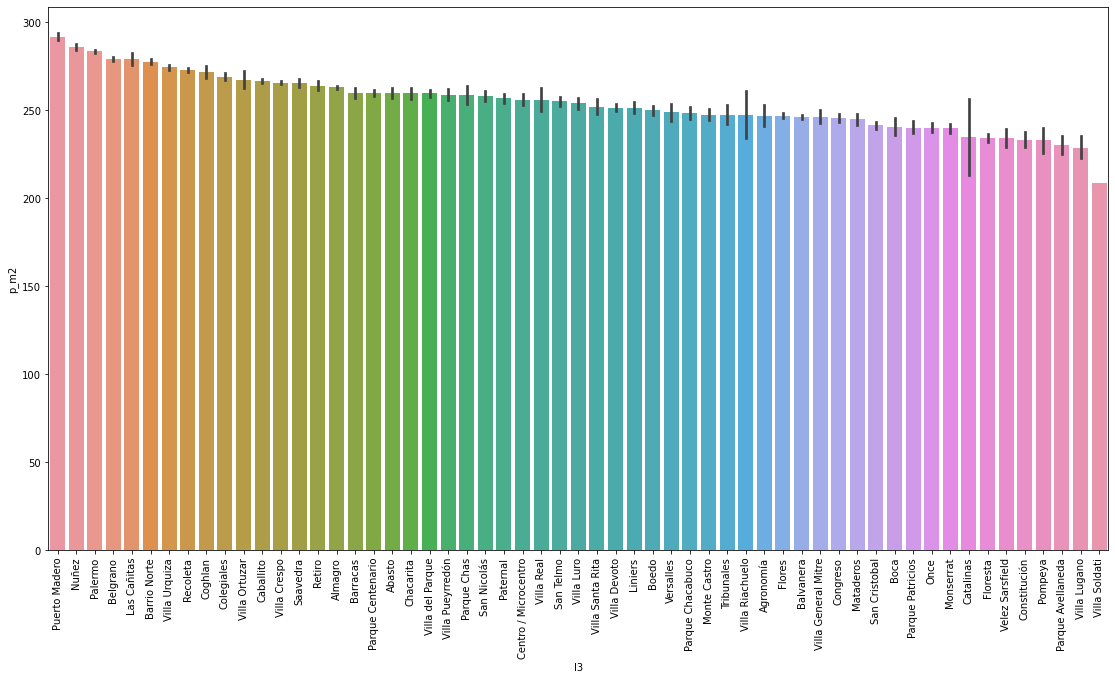

In [266]:
### Vamos a graficar los valores promedio segun barrio
plt.figure(figsize=(19,10))
plt.xticks(rotation = 90)
barrios = df4_filt.groupby('l3').mean().sort_values('p_m2', ascending=False).index
sns.barplot(x="l3", y="p_m2", order=barrios, data=df4_filt);

In [267]:
#tableprecios = table.sort_values('p_m2', ascending=False)
barrioscaros = table.sort_values('p_m2', ascending=False).iloc[:5]
barriosbaratos = table.sort_values('p_m2', ascending=True).iloc[:5]

In [268]:
barrioscaros

,p_m2
l3,
Puerto Madero,291.997650
Nuñez,286.104980
Palermo,283.611542
Belgrano,279.404633
Las Cañitas,279.230927


In [269]:
barriosbaratos

,p_m2
l3,
Villa Soldati,208.579773
Villa Lugano,228.911758
Parque Avellaneda,230.274506
Pompeya,233.102707
Constitución,233.212402


In [270]:
ibarrioscaros = barrioscaros.index 
ibarriosbaratos = barriosbaratos.index

Luego de trabajar con un criterio definido, arriesgado o no, para mi robusto (quitar el 10% de ambos lados) pudimos obtener los nombres de los 5 barrios mas caros y mas baratos de Capital Federal.
Ahora intentaremos evidenciar o encontrar si existe alguna caracteristica arquitectónica/civil a la cuestión.

###### Graficamos por Superficie Total en m2

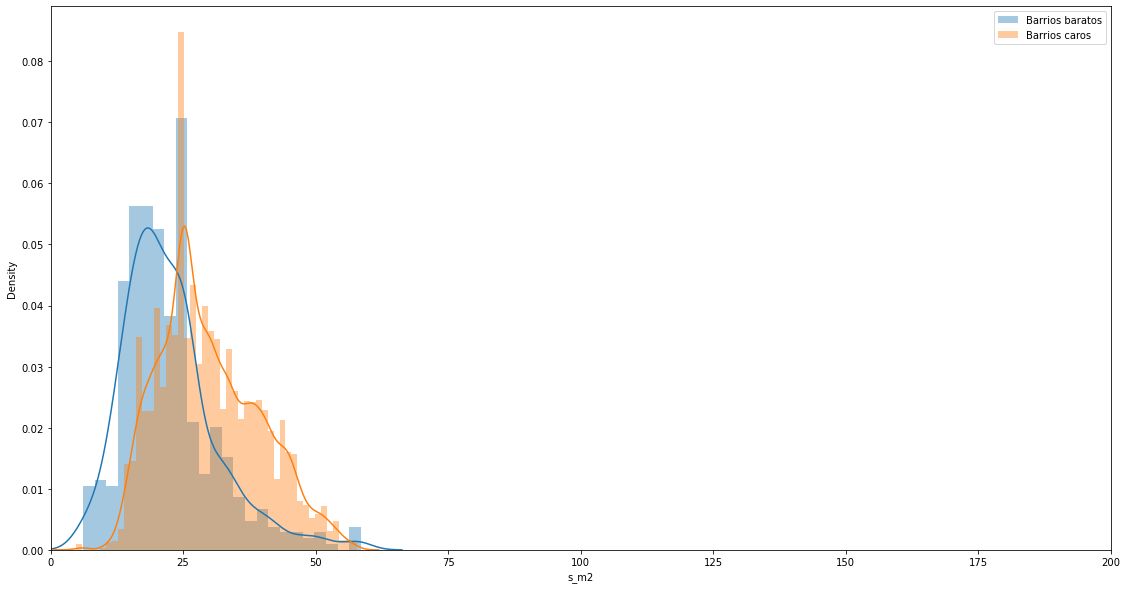

In [271]:
plt.figure(figsize=(19,10))
g = sns.distplot(df4_filt[df4_filt.l3.isin(ibarriosbaratos)].s_m2, label="Barrios baratos")
sns.distplot(df4_filt[df4_filt.l3.isin(ibarrioscaros)].s_m2, label="Barrios caros")
g.set_xlim(0, 200)
plt.legend()

Se puede ver una diferencia en terminos de metraje de las propiedades donde las mas caras tienden a ser de mayor superficie.

###### Graficamos por cantidad de habitaciones

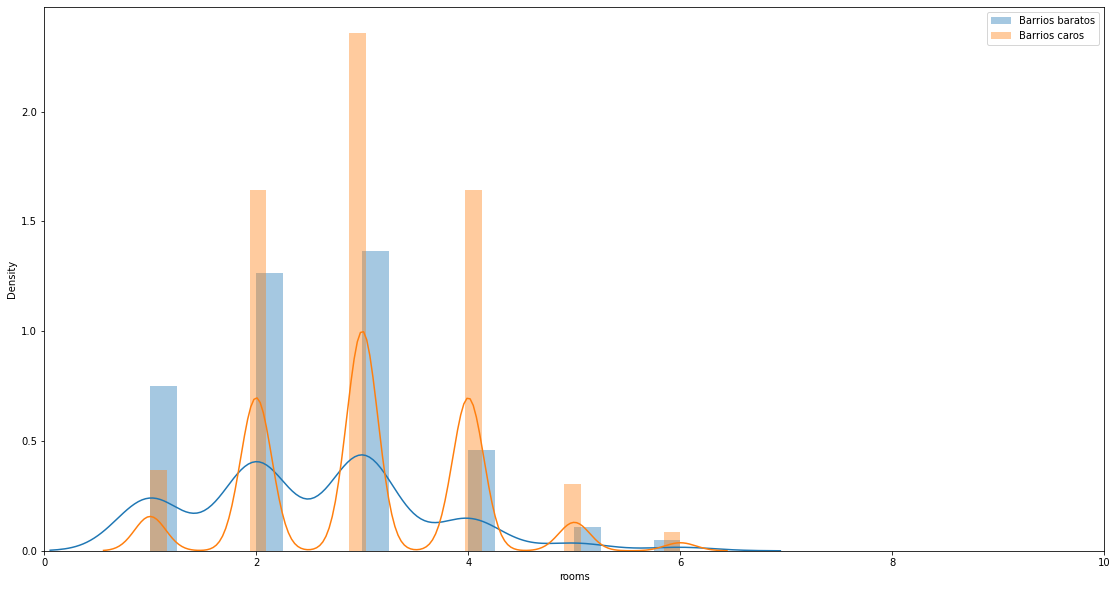

In [272]:
plt.figure(figsize=(19,10))
g = sns.distplot(df4_filt[df4_filt.l3.isin(ibarriosbaratos)].rooms, label="Barrios baratos")
sns.distplot(df4_filt[df4_filt.l3.isin(ibarrioscaros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

En terminos de ambientes, la diferencia no esta clara.

###### Graficamos por Valor M2

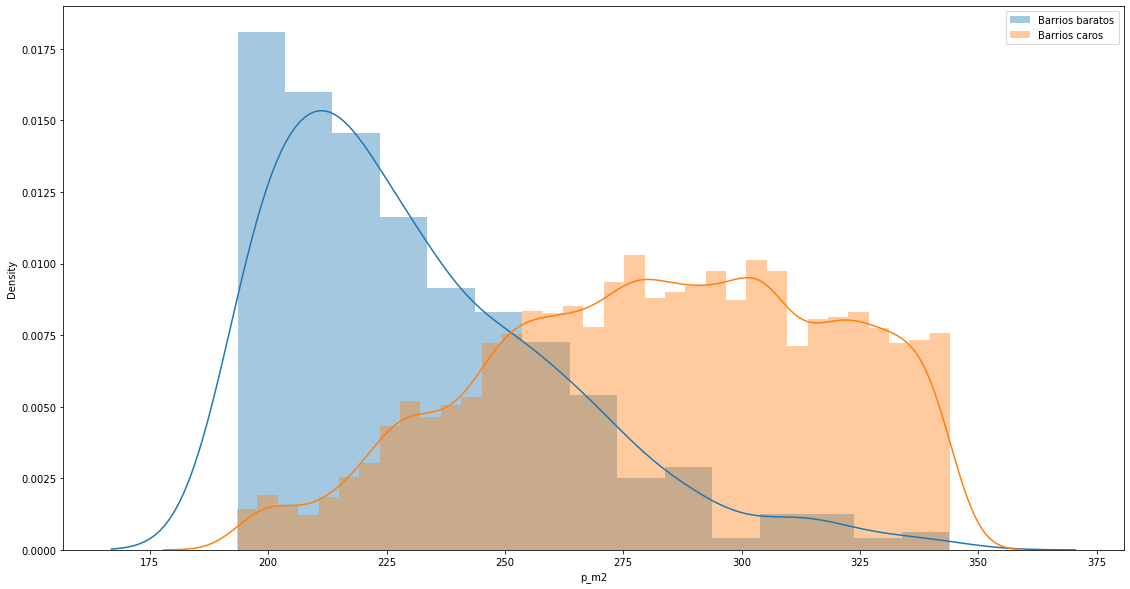

In [273]:
plt.figure(figsize=(19,10))
g = sns.distplot(df4_filt[df4_filt.l3.isin(ibarriosbaratos)].p_m2, label="Barrios baratos")
sns.distplot(df4_filt[df4_filt.l3.isin(ibarrioscaros)].p_m2, label="Barrios caros")
plt.legend()

Por ultimo, quizas un grafico que puede o no agregar a la cuestión y que era de esperar su resultado, las propiedades de los barrios mas caros, tienen precios por m2 mas caros que los de los barrios mas baratos.

##### Conclusión Final 1

Para concluir, es necesario recalcar que el analisis se basa en un dataset que provee una inmobiliaria (en este caso Properati, estamos hablando de una muestra y no una población, por lo tanto realizar inferencias en terminos reales requiere de otras cuestiones, variables y valores que deberan ser investigados en caso de generar opiniones sobre la realizad del mercado inmobiliario de Capital federal.

Podemos ver que en terminos de arquitectura de la propiedad no existen diferencias claras que justifiquen valores diferenciales, sera quizas una cuestión de historia la que fue formando el barrio: infraestructura, accesibilidad, seguridad, poder adquisitivo de los primeros habitantes, las que tengan la respuesta a esta cuestión.

#### 2 - RED NEURONAL

In [274]:
#Importamos Libreria
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

import tensorflow as tf




In [275]:
#Train - Test - Split de los datos
x_train,x_test, y_train,y_test = train_test_split(df2[["lat","lon", "rooms", "surface_total", "surface_covered", 
           "bedrooms", "bathrooms", "property_type_Casa", "property_type_Departamento", "property_type_PH"]],df2["price"],
                                                  test_size=0.3, random_state=1000)

In [276]:
#90% train 10% validación
x_train,x_val, y_train,y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=1000)

In [277]:
# Redimensionamos 
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

In [278]:
print("Tamaño de x_train:",x_train.shape)
print("Tamaño de y_train:",y_train.shape)

print("Tamaño de x_test:",x_test.shape)
print("Tamaño de y_test:",y_test.shape)

print("Tamaño de x_val:",x_val.shape)
print("Tamaño de y_val:",y_val.shape)

Tamaño de x_train: (84039, 10)
Tamaño de y_train: (84039, 1)
Tamaño de x_test: (40020, 10)
Tamaño de y_test: (40020, 1)
Tamaño de x_val: (9338, 10)
Tamaño de y_val: (9338, 1)


In [279]:
#Escalamos los datos
scalerx = StandardScaler()
scalerx.fit(x_train)
x_train_scaled = scalerx.transform(x_train)
x_val_scaled = scalerx.transform(x_val)
x_test_scaled = scalerx.transform(x_test)

scalery = StandardScaler()
scalery.fit(y_train)
y_train_scaled = scalery.transform(y_train)
y_val_scaled = scalery.transform(y_val)
y_test_scaled = scalery.transform(y_test)

In [280]:
#Establecemos semilla
tf.random.set_seed(42)

#Capas
#Utilizamos relu para que sea regresión lineal de alguna manera 
model = Sequential()
model.add(Dense(256,kernel_initializer='normal',input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(128,kernel_initializer='normal',activation="relu"))

model.add(Dense(1,activation = "linear")) 
#Establecemos el metodo de optimización y las metricas a utilizar
model.compile(optimizer = "adam",loss="mse",metrics=['mse'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 35,841
Trainable params: 35,841
Non-trainable params: 0
_________________________________________________________________
None


In [281]:
tf.random.set_seed(42)
#Entrenamos
model.fit(x_train_scaled,y_train_scaled, validation_data = (x_val_scaled,y_val_scaled),epochs=35, batch_size=1024)

Epoch 1/35
83/83 [==============================] - 0s 5ms/step - loss: 0.3983 - mse: 0.3983 - val_loss: 0.3246 - val_mse: 0.3246
Epoch 2/35
83/83 [==============================] - 0s 4ms/step - loss: 0.4547 - mse: 0.4547 - val_loss: 0.2993 - val_mse: 0.2993
Epoch 3/35
83/83 [==============================] - 0s 4ms/step - loss: 0.2841 - mse: 0.2841 - val_loss: 0.2933 - val_mse: 0.2933
Epoch 4/35
83/83 [==============================] - 0s 4ms/step - loss: 0.2859 - mse: 0.2859 - val_loss: 0.2745 - val_mse: 0.2745
Epoch 5/35
83/83 [==============================] - 0s 4ms/step - loss: 0.2769 - mse: 0.2769 - val_loss: 0.2757 - val_mse: 0.2757
Epoch 6/35
83/83 [==============================] - 0s 4ms/step - loss: 0.3142 - mse: 0.3142 - val_loss: 0.2594 - val_mse: 0.2594
Epoch 7/35
83/83 [==============================] - 0s 5ms/step - loss: 0.2764 - mse: 0.2764 - val_loss: 0.2546 - val_mse: 0.2546
Epoch 8/35
83/83 [==============================] - 0s 4ms/step - loss: 0.2538 - mse: 0.25

In [282]:
tf.random.set_seed(42)
# Imprimimos resultados / metricas
result = model.evaluate(x_test_scaled,y_test_scaled)
for i in range(len(model.metrics_names)):
 print("Metrica ",model.metrics_names[i],":", str(round(result[i],2)))

print("Score en entrenamiento:",r2_score(y_train_scaled,model.predict(x_train_scaled)))
print("Score en testing:",r2_score(y_test_scaled,model.predict(x_test_scaled)))
print("Score en validacion:",r2_score(y_val_scaled,model.predict(x_val_scaled)))

1251/1251 [==============================] - 1s 576us/step - loss: 0.2275 - mse: 0.2275
Metrica  loss : 0.23
Metrica  mse : 0.23
Score en entrenamiento: 0.7803436127480078
Score en testing: 0.7736859838067045
Score en validacion: 0.7775423700611654


Finalmente obtuvimos un modelo que obtuvo resultados mas que aceptables, por suerte

#### Conclusión Final 2

Como desafio, para ser sincero me arrepenti en el medio del proceso porque no tenia punto de partida en terminos teoricos pero de todas maneras creo que pude lograr un buen resultado. Sinceramente estoy muy sorprendido con la velocidad en terminos de recursos de pc para correr el modelo y su desempeño. Los otros modelos de este proyecto muy exigentes a niveles de horas de trabajo para mi computadora.
